In [77]:
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("df_v3_30_nearest_average.csv", index_col=0)

In [79]:
df = df.dropna()

In [80]:
def ar_loyer(x):
    ar_loyer_m2 = {
    "1": 37.1, "2": 36.3, "3": 37.3, "4": 37, "5": 35.3, "6": 38.4,
    "7": 36.9, "8": 34.6, "9": 33.3, "10": 32.7, "11": 32.2, "12": 29.2,
    "13": 29, "14": 30.5, "15": 30.5, "16": 32.6, "17": 32.2, "18": 30.9,
    "19": 27.4, "20": 28
    }
    return ar_loyer_m2[x]

In [81]:
df['District'] = df['District'].apply(lambda x : ar_loyer(str(x)))

In [82]:
df = df.drop(columns=["lat", "lon"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40042 entries, 0 to 40043
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   District                      40042 non-null  float64
 1   Accommodates                  40042 non-null  int64  
 2   Bathrooms                     40042 non-null  float64
 3   Bedrooms                      40042 non-null  float64
 4   Beds                          40042 non-null  float64
 5   Price                         40042 non-null  float64
 6   Security Deposit              40042 non-null  float64
 7   Cleaning Fee                  40042 non-null  float64
 8   Guests Included               40042 non-null  int64  
 9   Extra People                  40042 non-null  int64  
 10  Availability 60               40042 non-null  int64  
 11  Reviews per Month             40042 non-null  float64
 12  Calendar Updated (in days)    40042 non-null  int64  
 13  H

In [10]:
df.head()

District  Accommodates  Bathrooms  Bedrooms  Beds  Price  Security Deposit  \
0      32.2             4        1.0       1.0   1.0   60.0             300.0   
1      32.2             6        1.0       2.0   2.0  160.0             800.0   
2      32.2             4        1.0       2.0   2.0  120.0             500.0   
3      32.2             4        1.0       1.0   2.0  120.0             800.0   
4      32.2             4        1.0       1.0   2.0   54.0             200.0   

   Cleaning Fee  Guests Included  Extra People  ...  Global review score  \
0          15.0                1             0  ...                10.00   
1          40.0                1             0  ...                 9.67   
2          15.0                1             0  ...                10.00   
3          40.0                2            20  ...                 9.00   
4          25.0                1             5  ...                 9.00   

   Type of property  Type of Room  Real Bed  Cancellation_Policy  Superhost  \
0                 3             3         1                    3          0   
1                 3             3         1                    1          0   
2                 3             3         1                    1          0   
3                 3             3         1                    3          0   
4                 3             3         1                    2          0   

   Host profile pic  Host ID verified  Instant bookable  30 nearest  
0                 1                 1                 1    0.257026  
1                 1                 1                 1    0.332669  
2                 1                 0                 0    0.224522  
3                 1                 1                 0    0.373449  
4                 1                 1                 0    0.343726  

[5 rows x 26 columns]

#### Clustering

In [83]:
scaler = preprocessing.StandardScaler()

In [102]:
X = scaler.fit_transform(df[['District', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Availability 60', 'Reviews per Month', 'Calendar Updated (in days)',
       'Host since (in days)', 'Number of Amenities',
       'Number of host verifications', 'Global review score',
       'Type of property', 'Type of Room', 'Real Bed', 'Cancellation_Policy',
       'Superhost', 'Host profile pic', 'Host ID verified', 'Instant bookable',
       '30 nearest']])

In [103]:
X.shape

(40042, 26)

In [43]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        print(k)

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [ ]:
k, res_df = optimalK(X, nrefs=3, maxClusters=20)

# Opitmal k = 19 clusters

In [ ]:
k

In [ ]:
#k_bis, res_df_bis = optimalK(X, nrefs=3, maxClusters= 19 à 30)

k_bis = 19

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
pca.fit(X)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_[:2])

In [ ]:
print("% de variance expliquée par : ")
for i in range(1,len(pca.explained_variance_ratio_)+1):
    s = sum(pca.explained_variance_ratio_[:i])
    print(f"{i} composantes : {s:.2f}")

In [ ]:
from fanalysis.pca import PCA

In [ ]:
df_pca = df[['District', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Availability 60', 'Reviews per Month', 'Calendar Updated (in days)',
       'Host since (in days)', 'Number of Amenities',
       'Number of host verifications', 'Global review score',
       'Type of property', 'Type of Room', 'Real Bed', 'Cancellation_Policy',
       'Superhost', 'Host profile pic', 'Host ID verified', 'Instant bookable',
       '30 nearest']]

In [ ]:
my_pca = PCA(std_unit=True, row_labels=None, col_labels=df_pca.columns.values)

In [ ]:
my_pca.fit(X)

In [ ]:
print(my_pca.eig_)

In [ ]:
my_pca.plot_eigenvalues(type="percentage", figsize=(10,5))

In [ ]:
df_cols = my_pca.col_topandas()


In [ ]:
print(df_cols)

In [ ]:
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2, figsize=(20,20))

In [ ]:
my_pca.correlation_circle(num_x_axis=3, num_y_axis=4, figsize=(20,20))

# Identification des clusters

In [129]:
km = KMeans(3)

In [130]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [131]:
km.cluster_centers_

array([[ 0.31779192,  1.60150822,  1.13184896,  1.54917646,  1.59569825,
         1.52245183,  0.57675642,  1.15090351,  1.14700305,  0.58358688,
         0.0316258 , -0.06760258, -0.22761701,  0.19414821,  0.58508856,
         0.03460197,  0.06520761,  0.19182725,  0.34014034,  0.33241721,
         0.52061777,  0.15578305,  0.00661504,  0.162989  ,  0.09264529,
        -0.00279512],
       [-0.08231419, -0.2920487 , -0.19274845, -0.27139677, -0.27096302,
        -0.28016037, -0.17190767, -0.25353861, -0.2307727 , -0.12589559,
         0.03469951,  0.00188992,  0.1075609 , -0.27889753, -0.20536044,
        -0.88301907, -0.05973281, -0.08337942, -0.08408281, -0.05488097,
        -0.23186662, -0.08325178, -0.07047733, -1.2298393 ,  0.02338024,
        -0.00353871],
       [-0.03380933, -0.25555457, -0.1900828 , -0.2549106 , -0.26852054,
        -0.24118547, -0.04573924, -0.15336106, -0.16803895, -0.07961397,
        -0.03312018,  0.01802873, -0.00950284,  0.13794164, -0.02491521,
       

In [132]:
profils = scaler.inverse_transform(km.cluster_centers_)

In [135]:
df_profils = pd.DataFrame(data=profils, columns=df.columns).round(decimals=2)

In [136]:
df_profils = df_profils.round({"Accomodates" : 0, "Bedrooms":0, "Bathrooms" : 0, "Beds" : 0,
                  "Extra People": 0, "Guests Included":0, "Number of Amenities" :0,
                  "Number of host verifications" : 0, "Real Bed" : 0,"Type of property":0,
                  "Type of Room":0
                })

In [137]:
df_profils[df_profils.columns[:13]]

District  Accommodates  Bathrooms  Bedrooms  Beds   Price  \
0     33.52          5.46        2.0       2.0   3.0  201.01   
1     32.31          2.62        1.0       1.0   1.0   73.00   
2     32.45          2.68        1.0       1.0   1.0   75.77   

   Security Deposit  Cleaning Fee  Guests Included  Extra People  \
0            320.04         55.33              3.0          14.0   
1            160.71         17.10              1.0           5.0   
2            187.56         19.83              1.0           5.0   

   Availability 60  Reviews per Month  Calendar Updated (in days)  
0            18.96               1.10                       28.25  
1            19.02               1.19                       50.06  
2            17.61               1.21                       42.45

In [138]:
df_profils[df_profils.columns[13:]]

Host since (in days)  Number of Amenities  Number of host verifications  \
0               2260.33                 16.0                           4.0   
1               2001.71                 13.0                           3.0   
2               2229.60                 13.0                           5.0   

   Global review score  Type of property  Type of Room  Real Bed  \
0                 9.50               3.0           3.0       1.0   
1                 9.43               3.0           3.0       1.0   
2                 9.48               3.0           3.0       1.0   

   Cancellation_Policy  Superhost  Host profile pic  Host ID verified  \
0                 2.53       0.11              1.00              0.68   
1                 1.92       0.05              0.99              0.00   
2                 2.12       0.08              1.00              1.00   

   Instant bookable  30 nearest  
0              0.26        0.41  
1              0.23        0.41  
2              0.20        0.41

In [128]:
#df_profils.to_csv('profil1_round.csv')

In [96]:
df.iloc[0,]

District                          32.200000
Accommodates                       4.000000
Bathrooms                          1.000000
Bedrooms                           1.000000
Beds                               1.000000
Price                             60.000000
Security Deposit                 300.000000
Cleaning Fee                      15.000000
Guests Included                    1.000000
Extra People                       0.000000
Availability 60                    0.000000
Reviews per Month                  1.000000
Calendar Updated (in days)        14.000000
Host since (in days)            2083.000000
Number of Amenities               14.000000
Number of host verifications       5.000000
Global review score               10.000000
Type of property                   3.000000
Type of Room                       3.000000
Real Bed                           1.000000
Cancellation_Policy                3.000000
Superhost                          0.000000
Host profile pic                

In [16]:
cluster_appartenance = km.predict(X)

In [17]:
df_kmean = df[['District', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Availability 60', 'Reviews per Month', 'Calendar Updated (in days)',
       'Host since (in days)', 'Number of Amenities',
       'Number of host verifications', 'Global review score',
       'Type of property', 'Type of Room', 'Real Bed', 'Cancellation_Policy',
       'Superhost', 'Host profile pic', 'Host ID verified', 'Instant bookable',
       '30 nearest']]

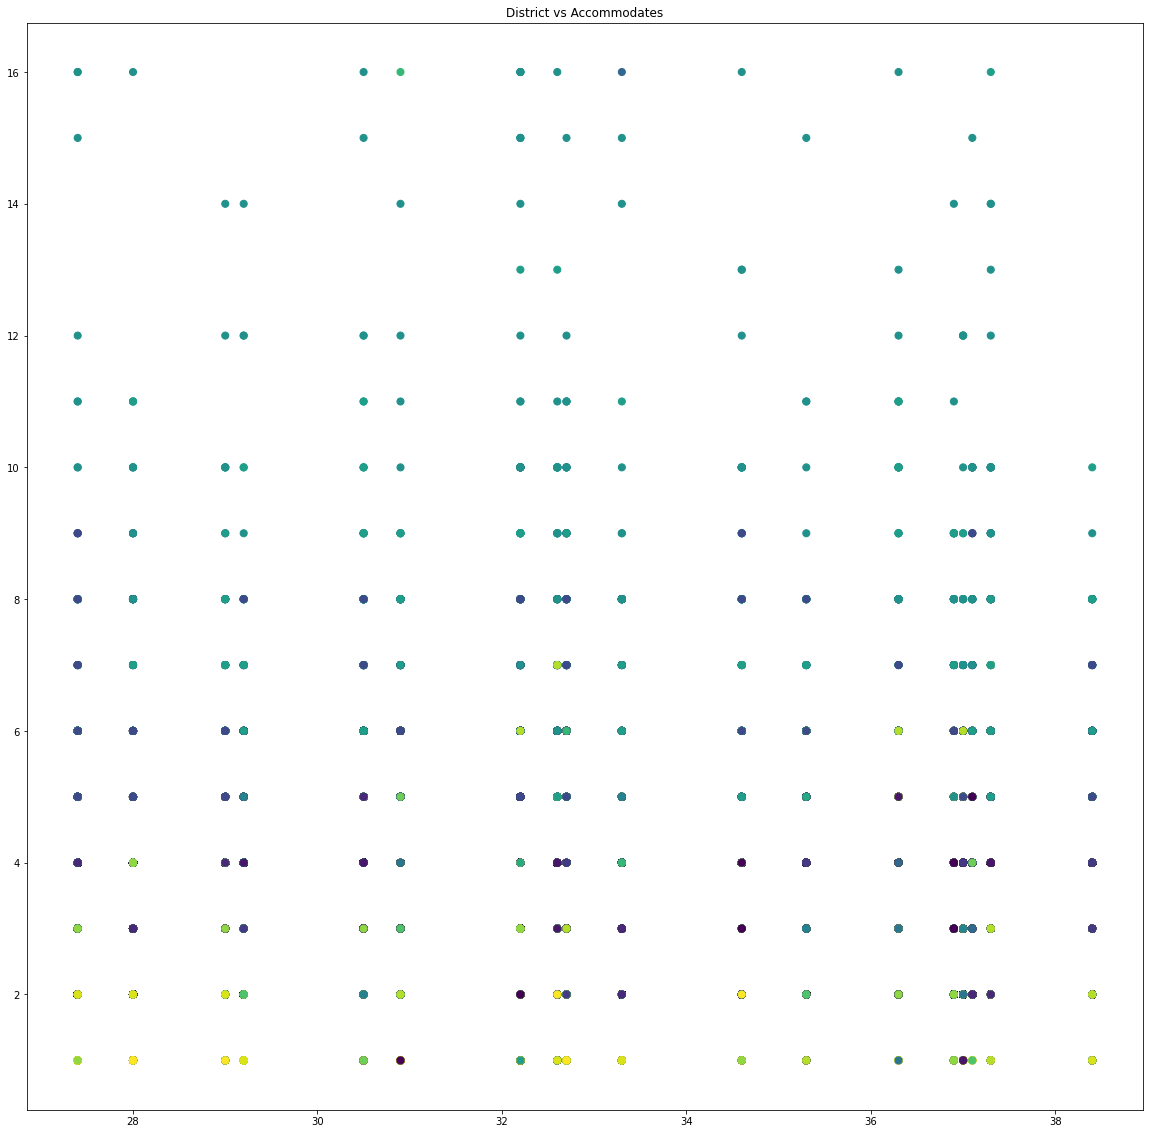

<Figure size 432x288 with 0 Axes>

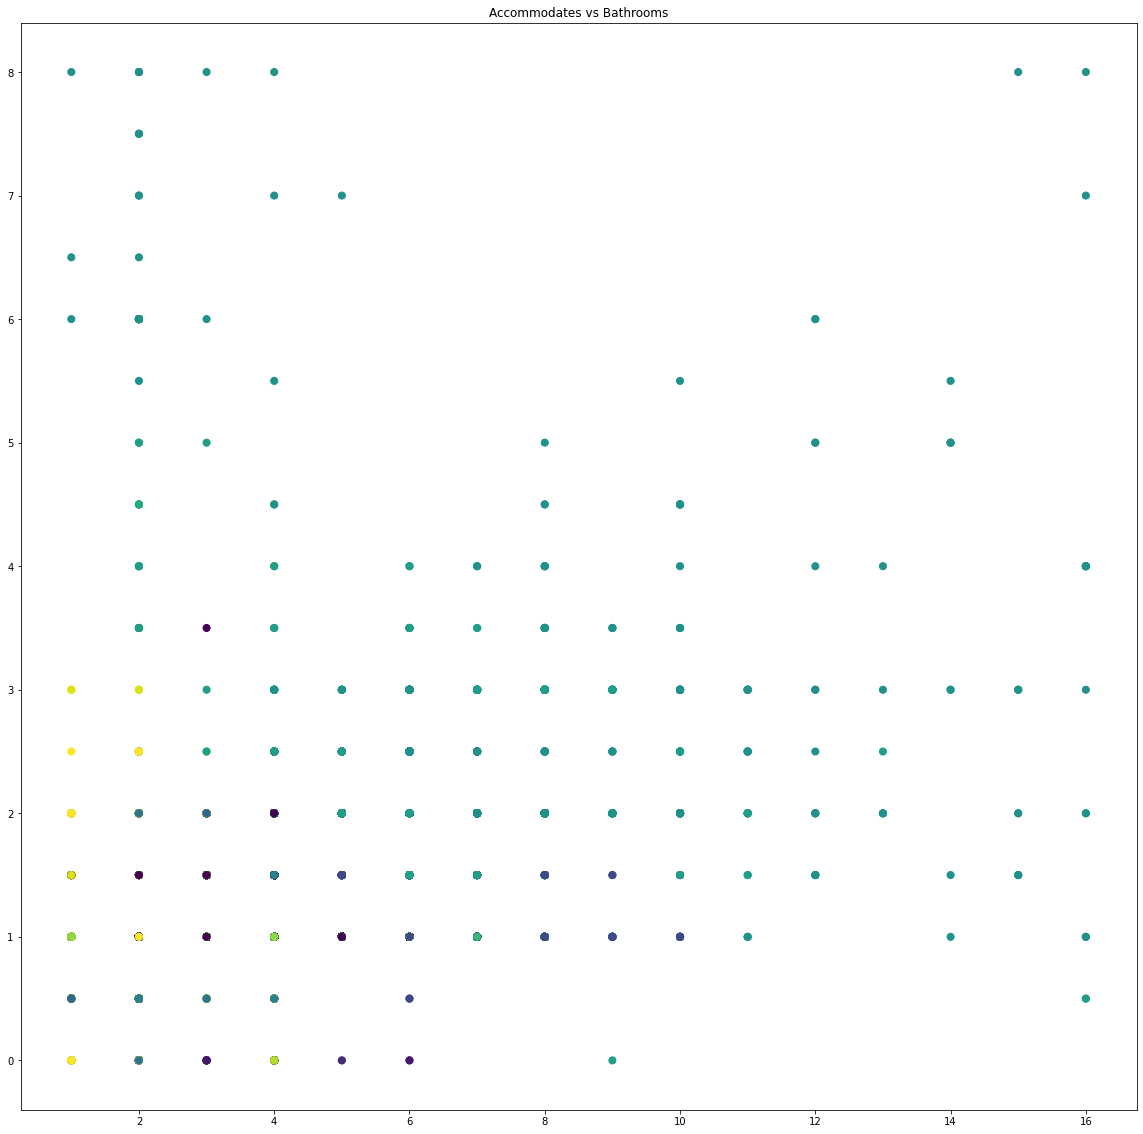

<Figure size 432x288 with 0 Axes>

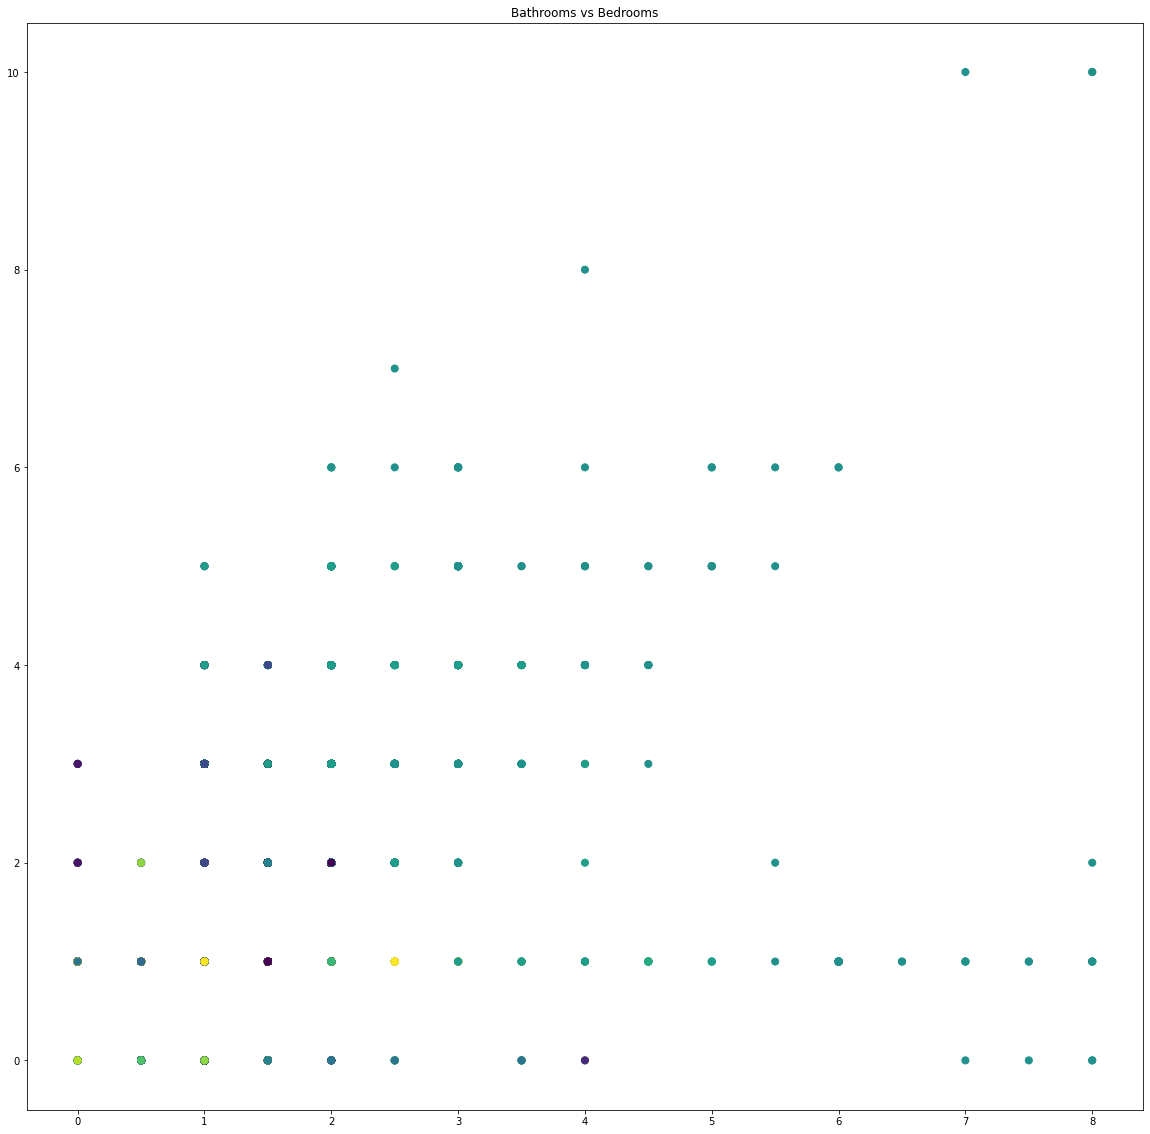

<Figure size 432x288 with 0 Axes>

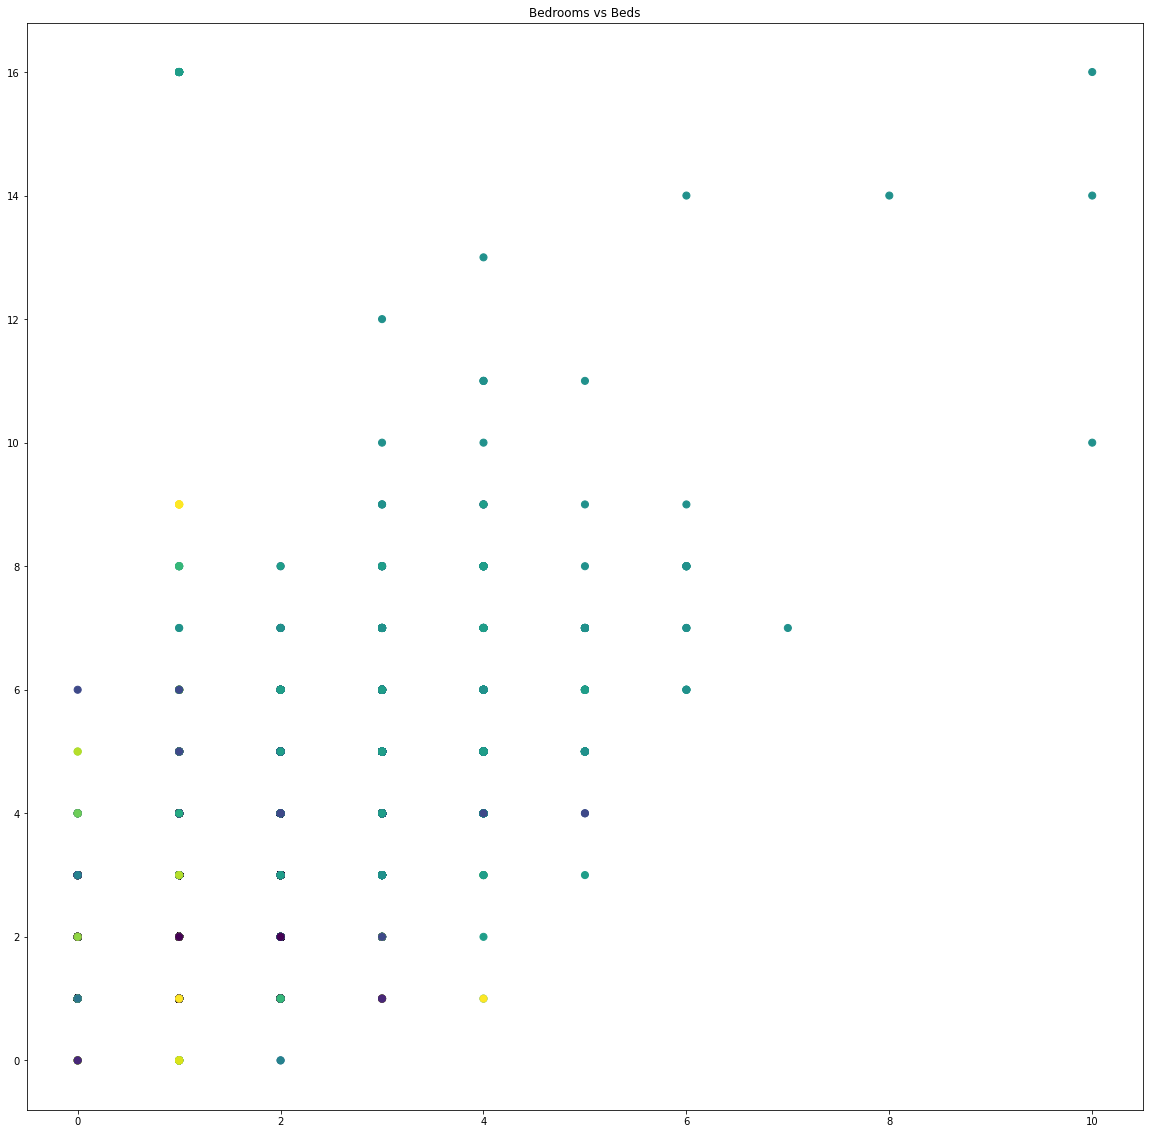

<Figure size 432x288 with 0 Axes>

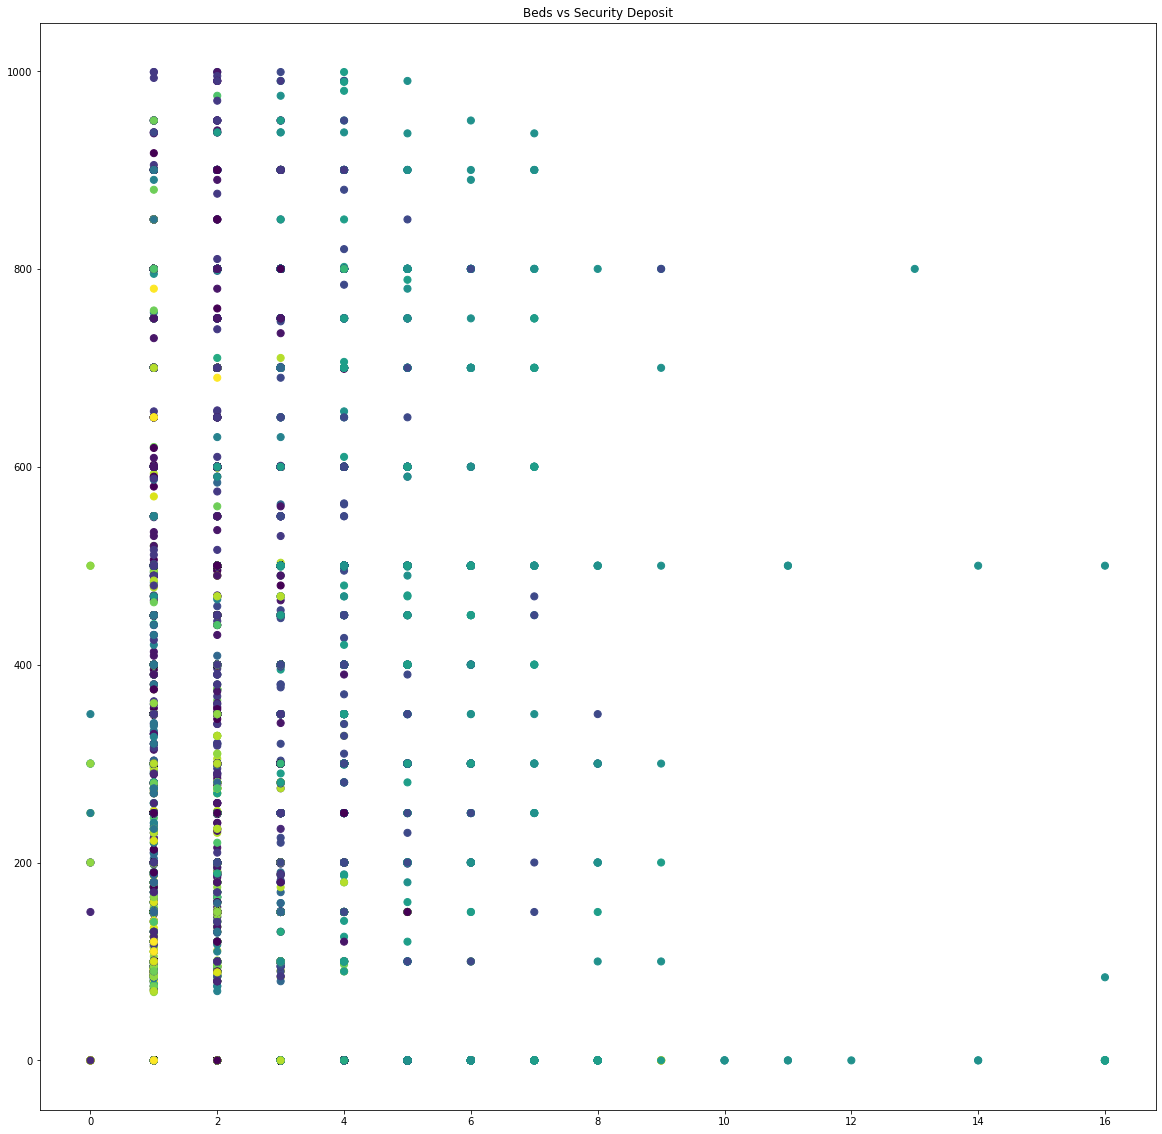

<Figure size 432x288 with 0 Axes>

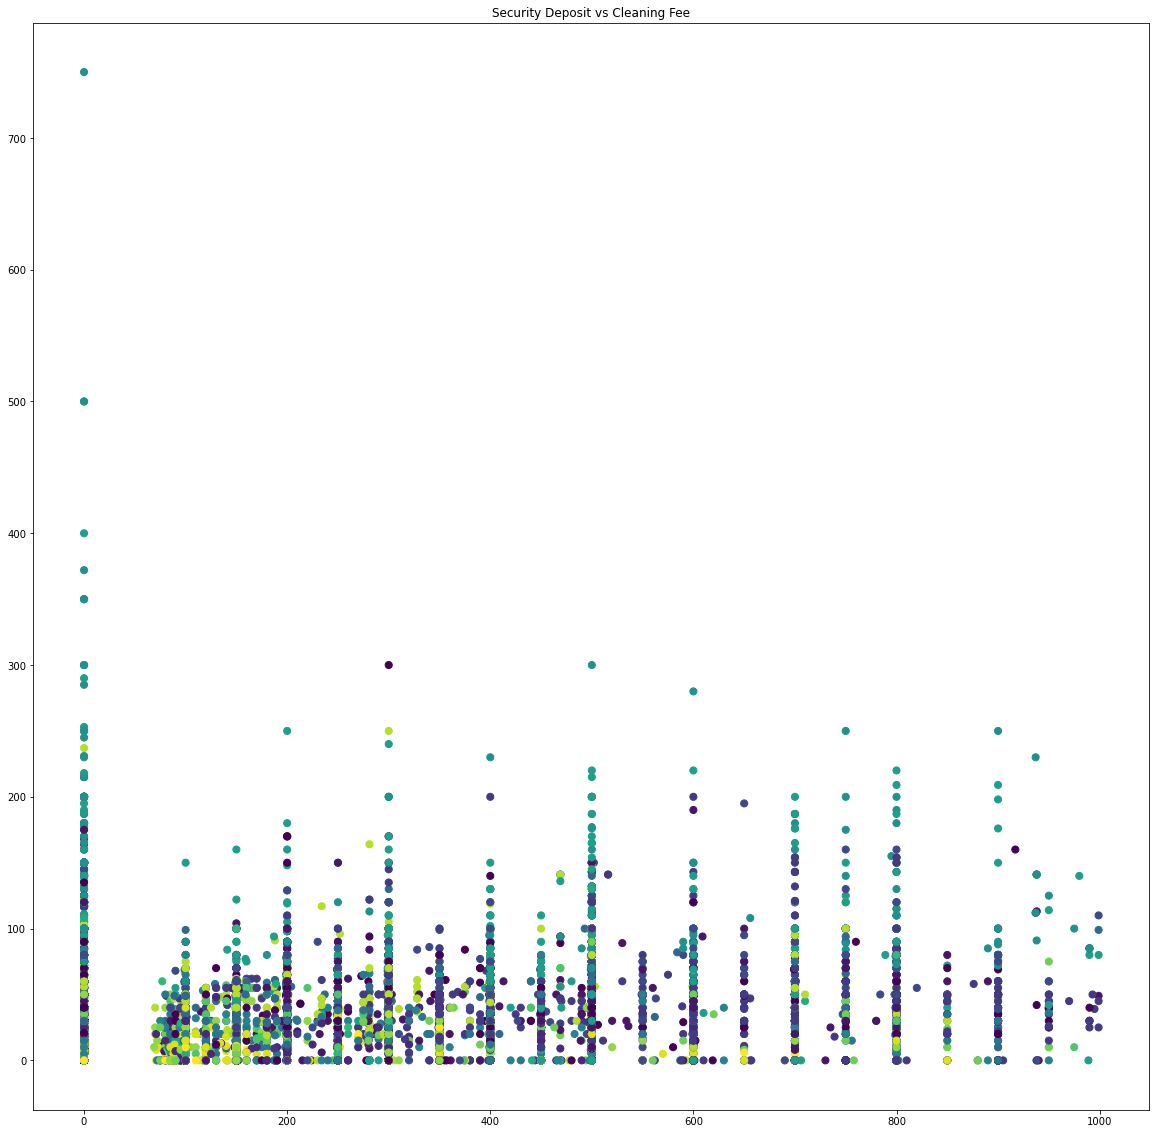

<Figure size 432x288 with 0 Axes>

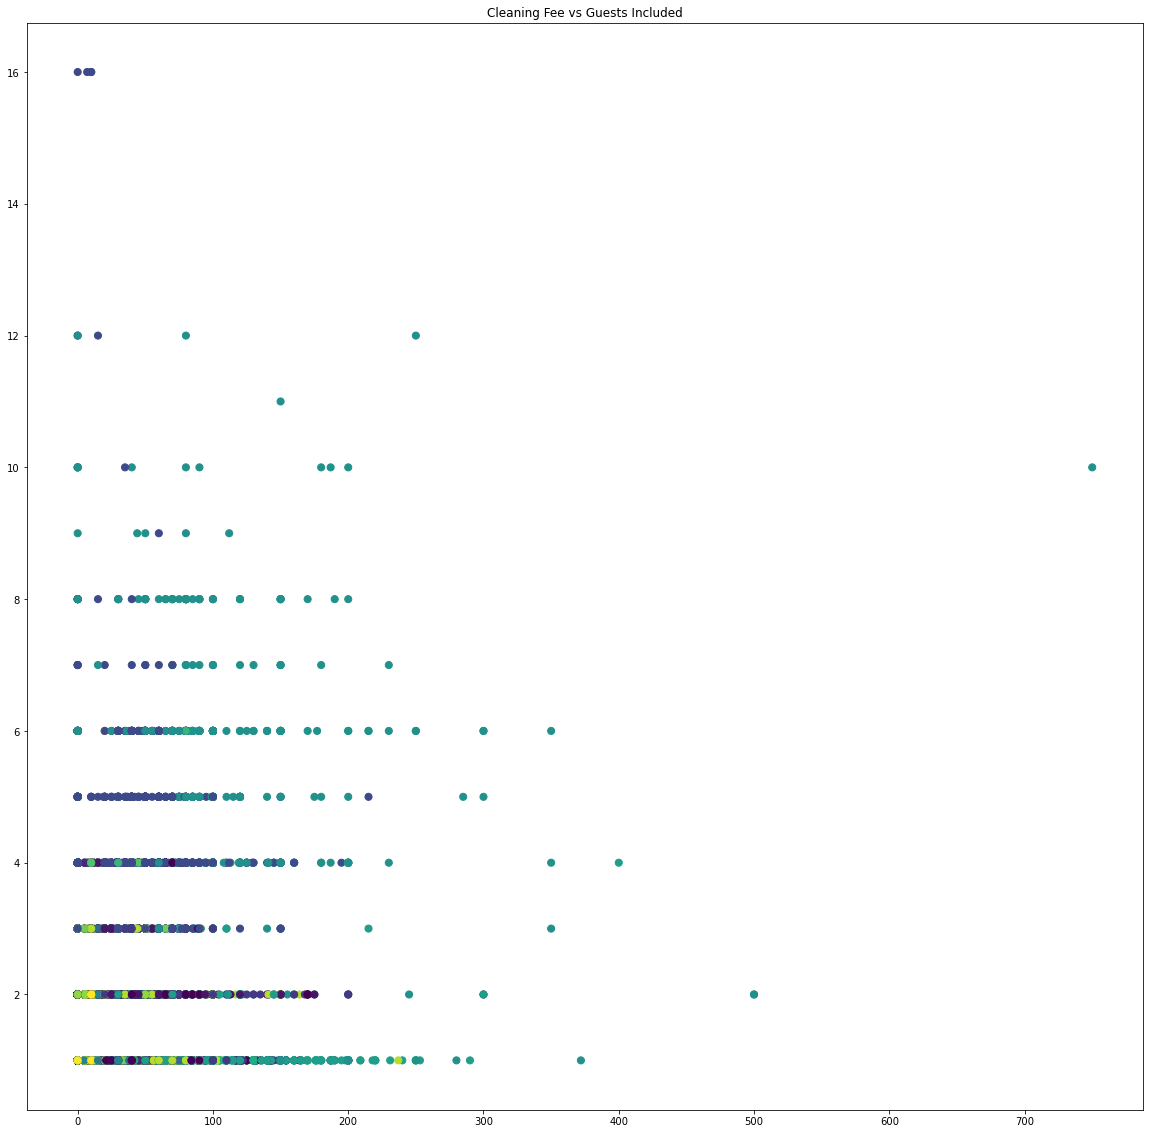

<Figure size 432x288 with 0 Axes>

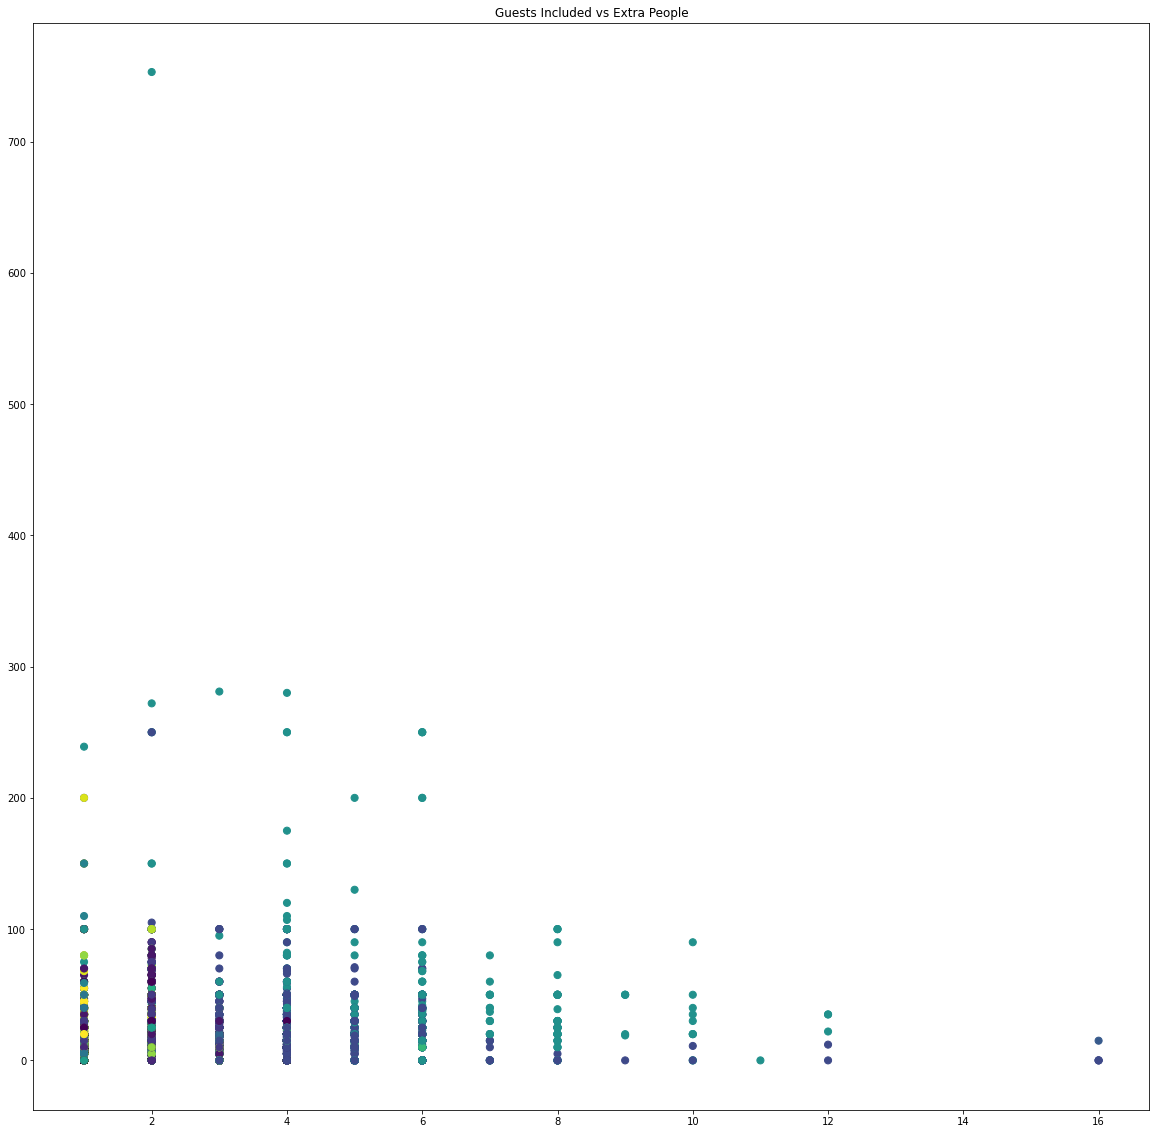

<Figure size 432x288 with 0 Axes>

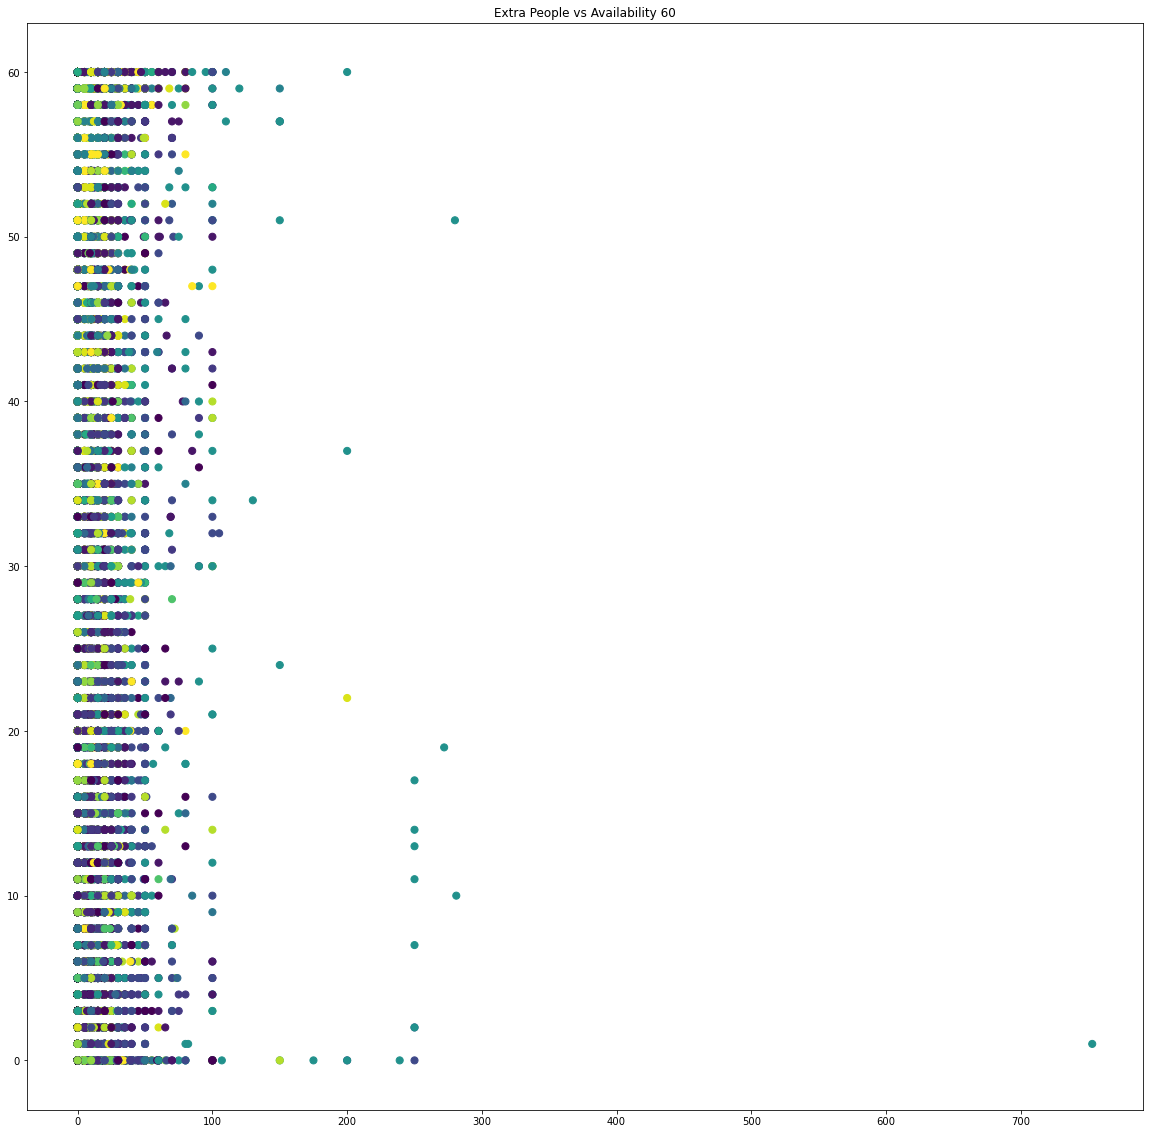

<Figure size 432x288 with 0 Axes>

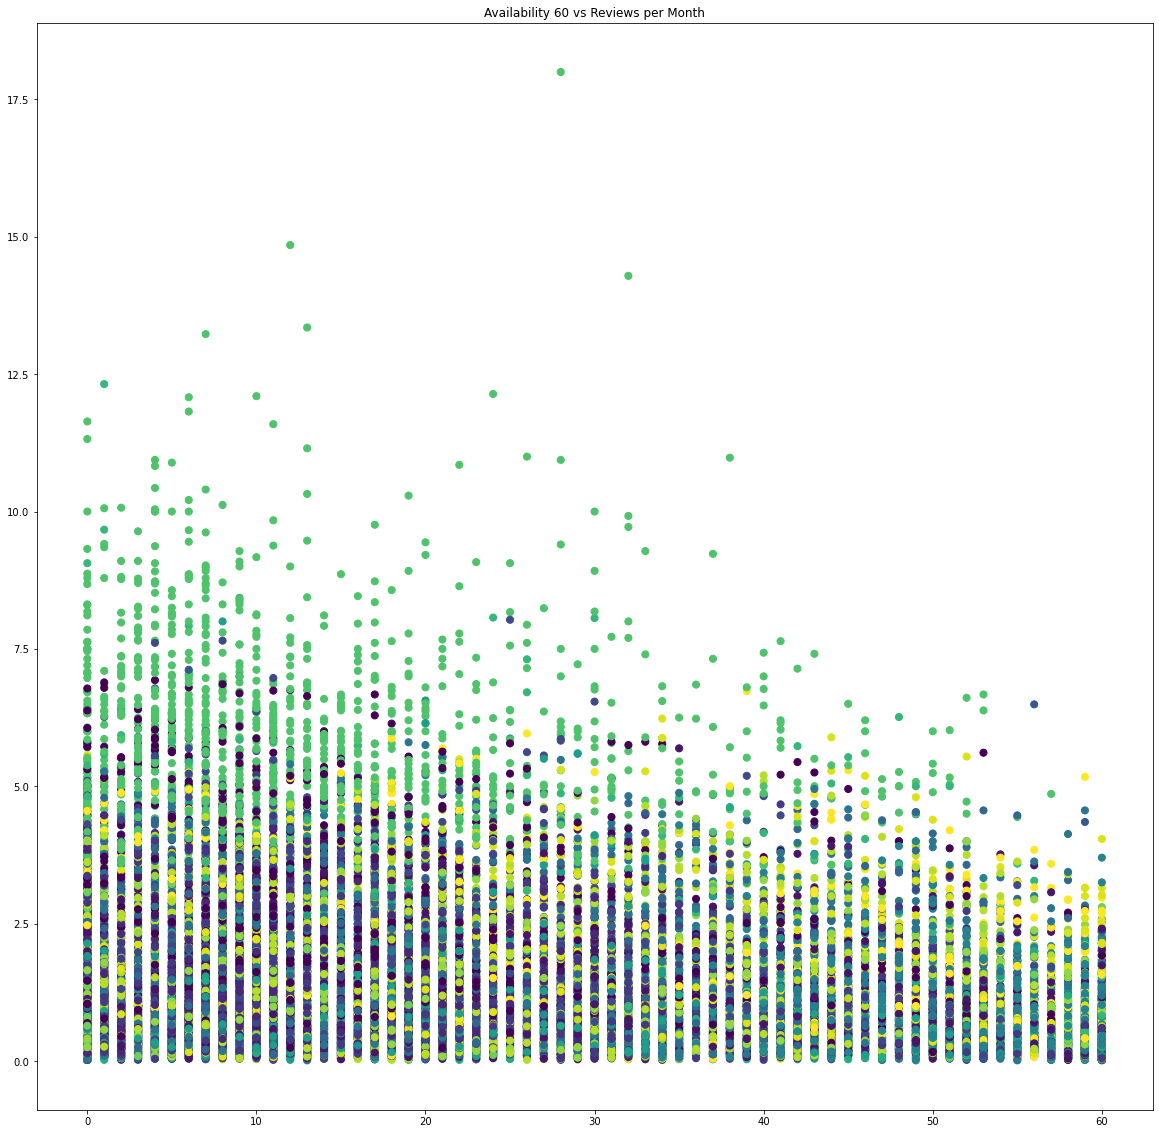

<Figure size 432x288 with 0 Axes>

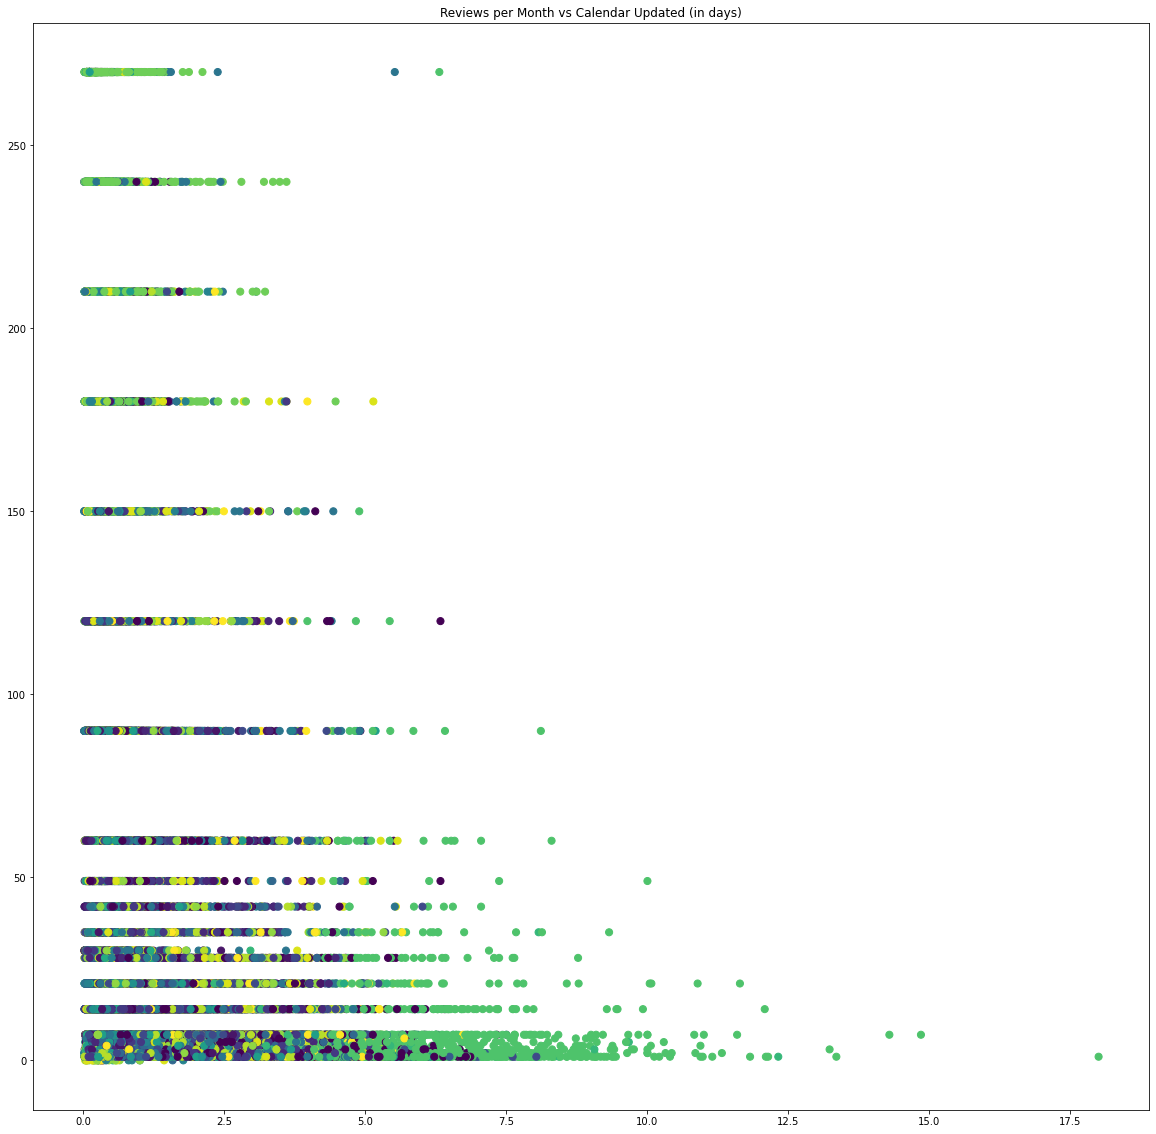

<Figure size 432x288 with 0 Axes>

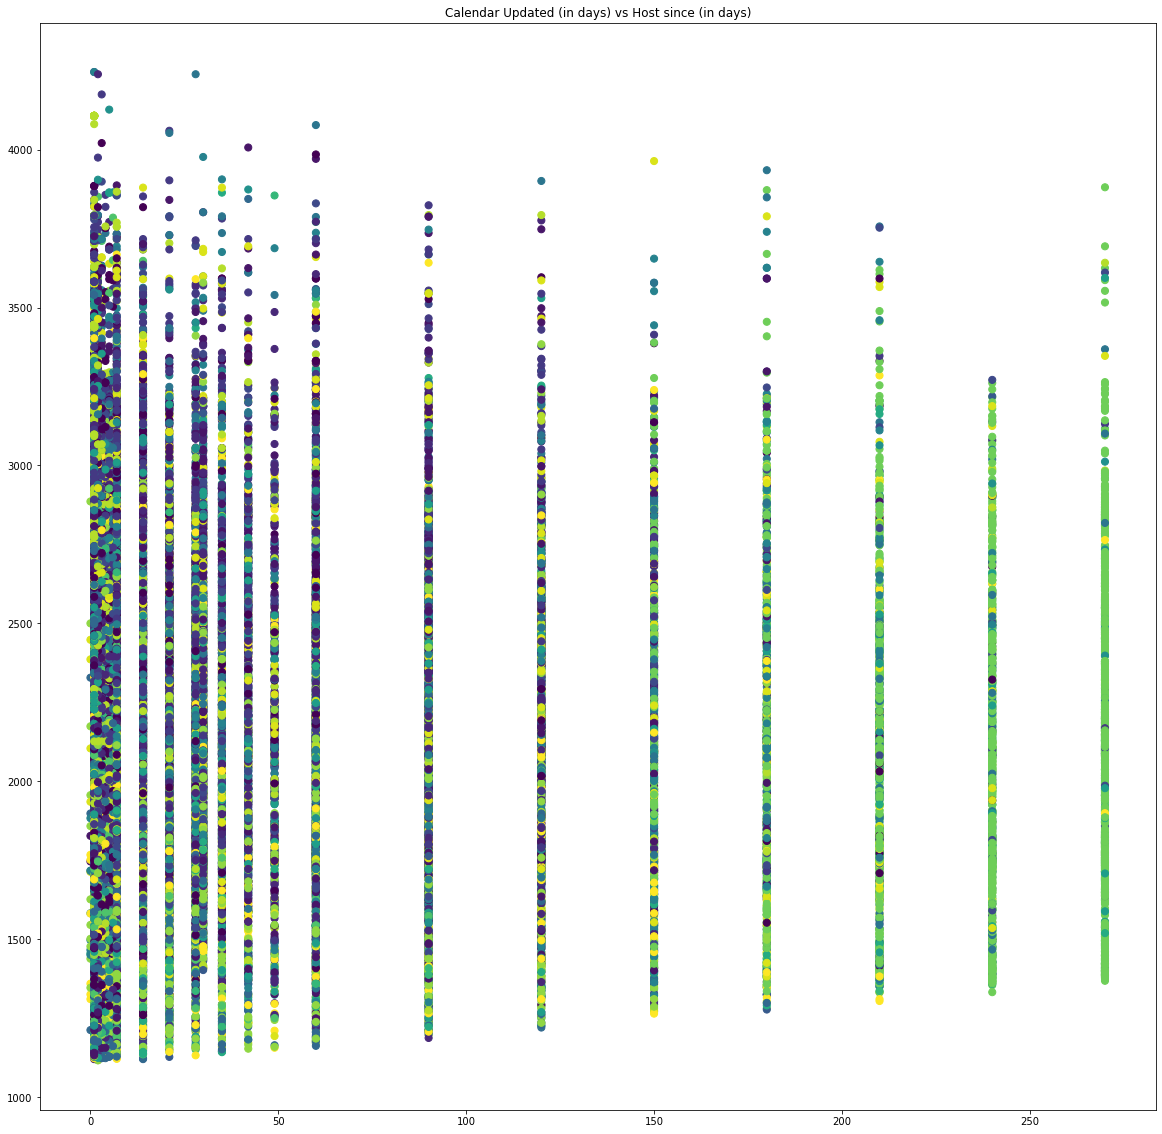

<Figure size 432x288 with 0 Axes>

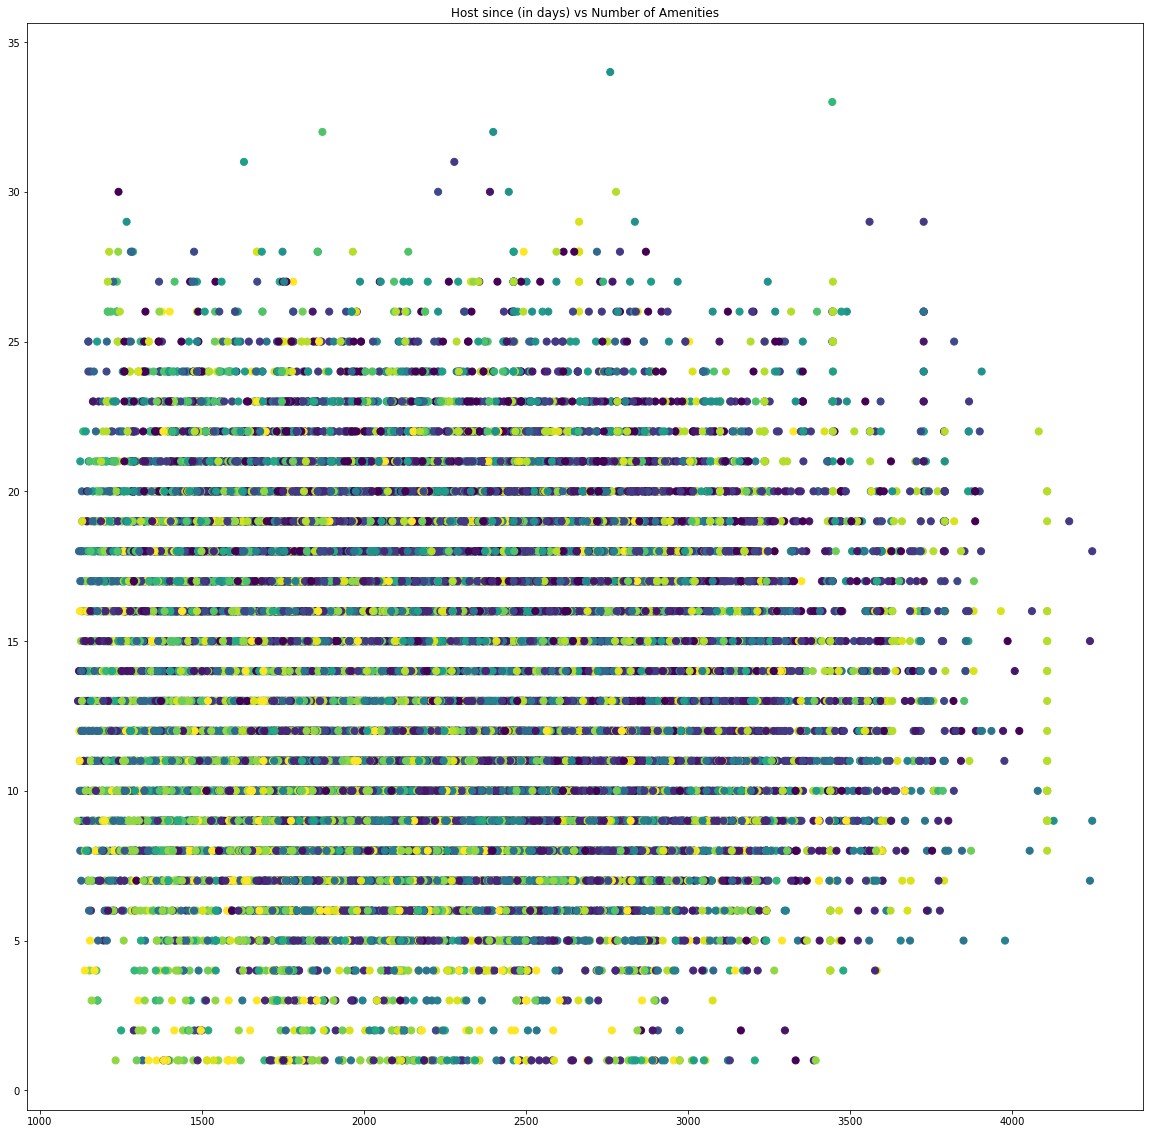

<Figure size 432x288 with 0 Axes>

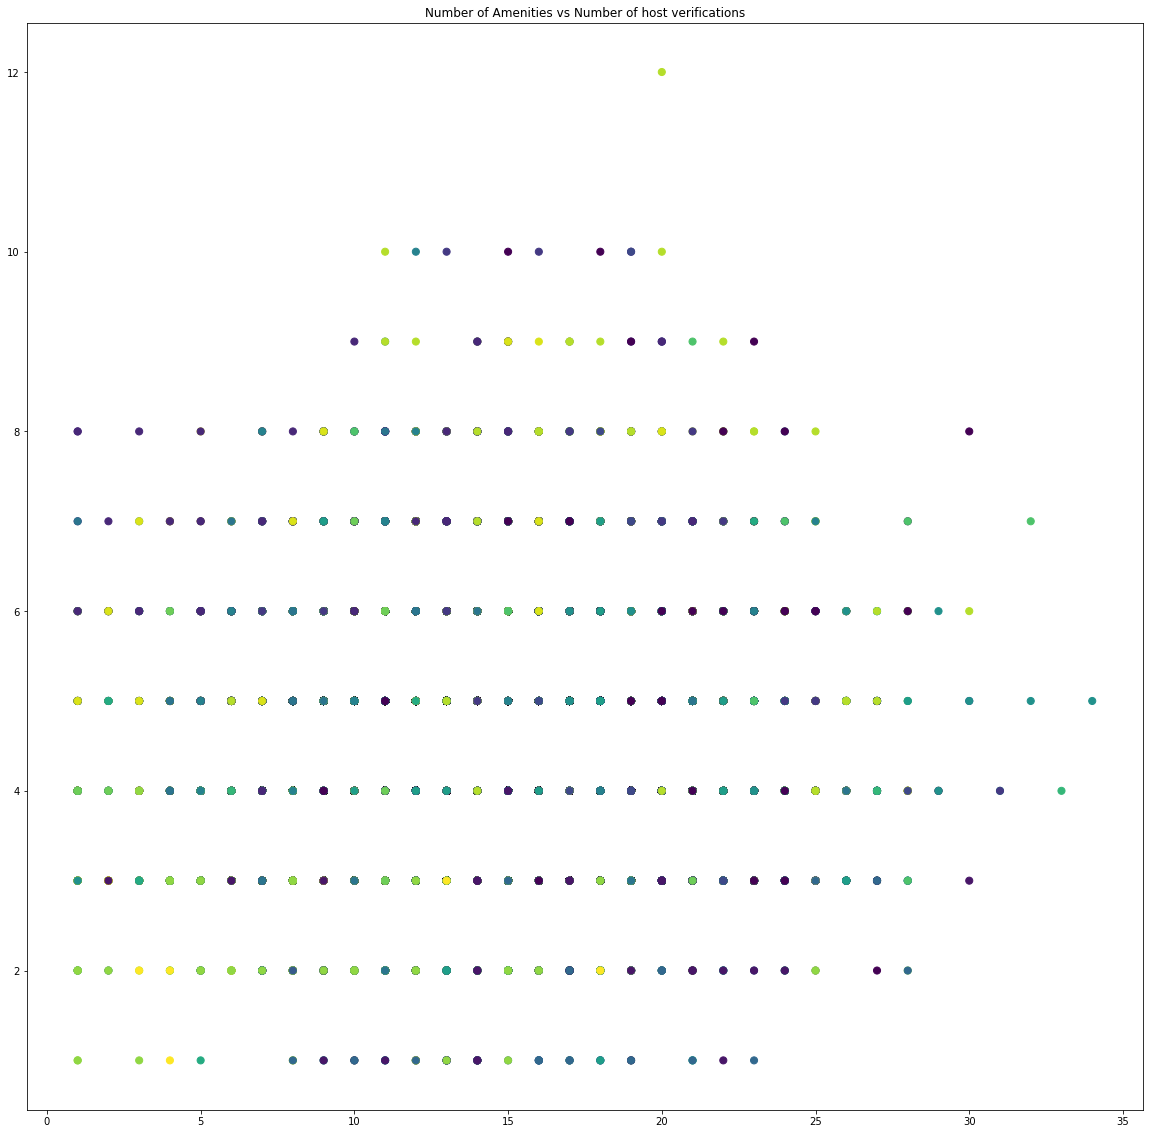

<Figure size 432x288 with 0 Axes>

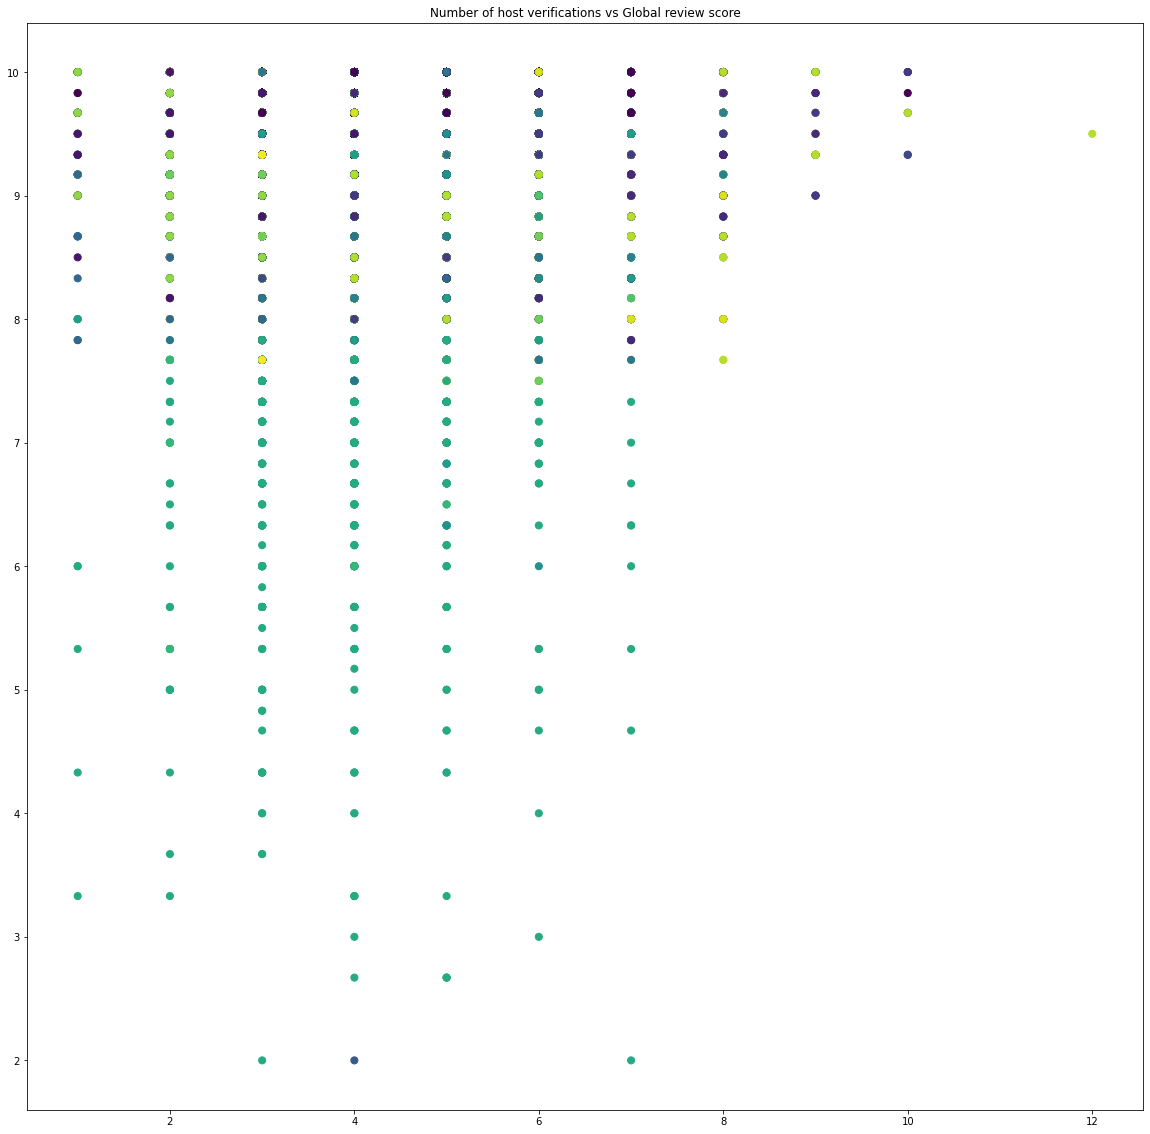

<Figure size 432x288 with 0 Axes>

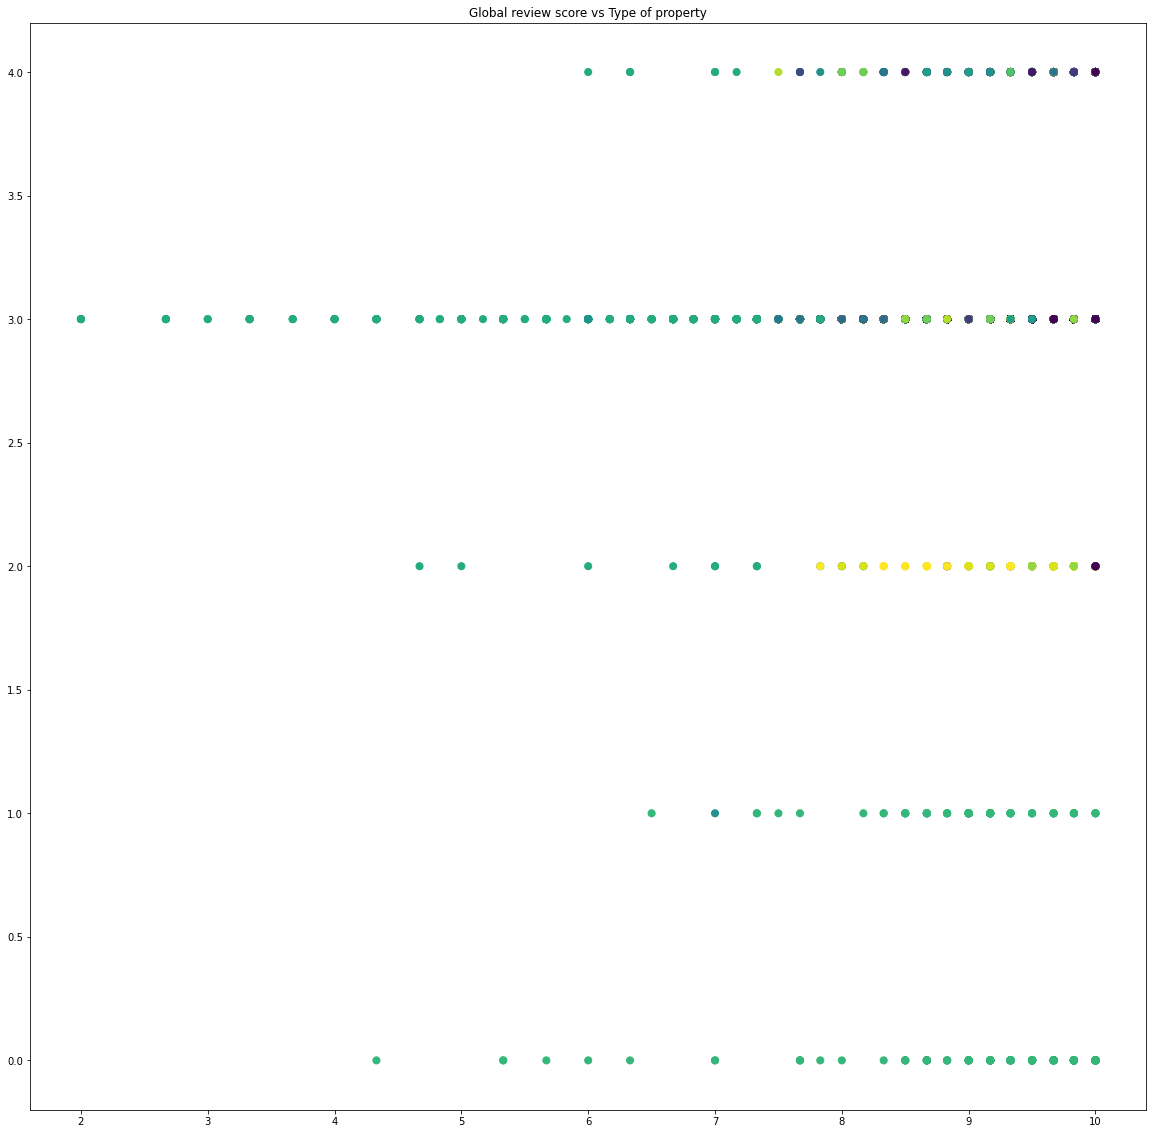

<Figure size 432x288 with 0 Axes>

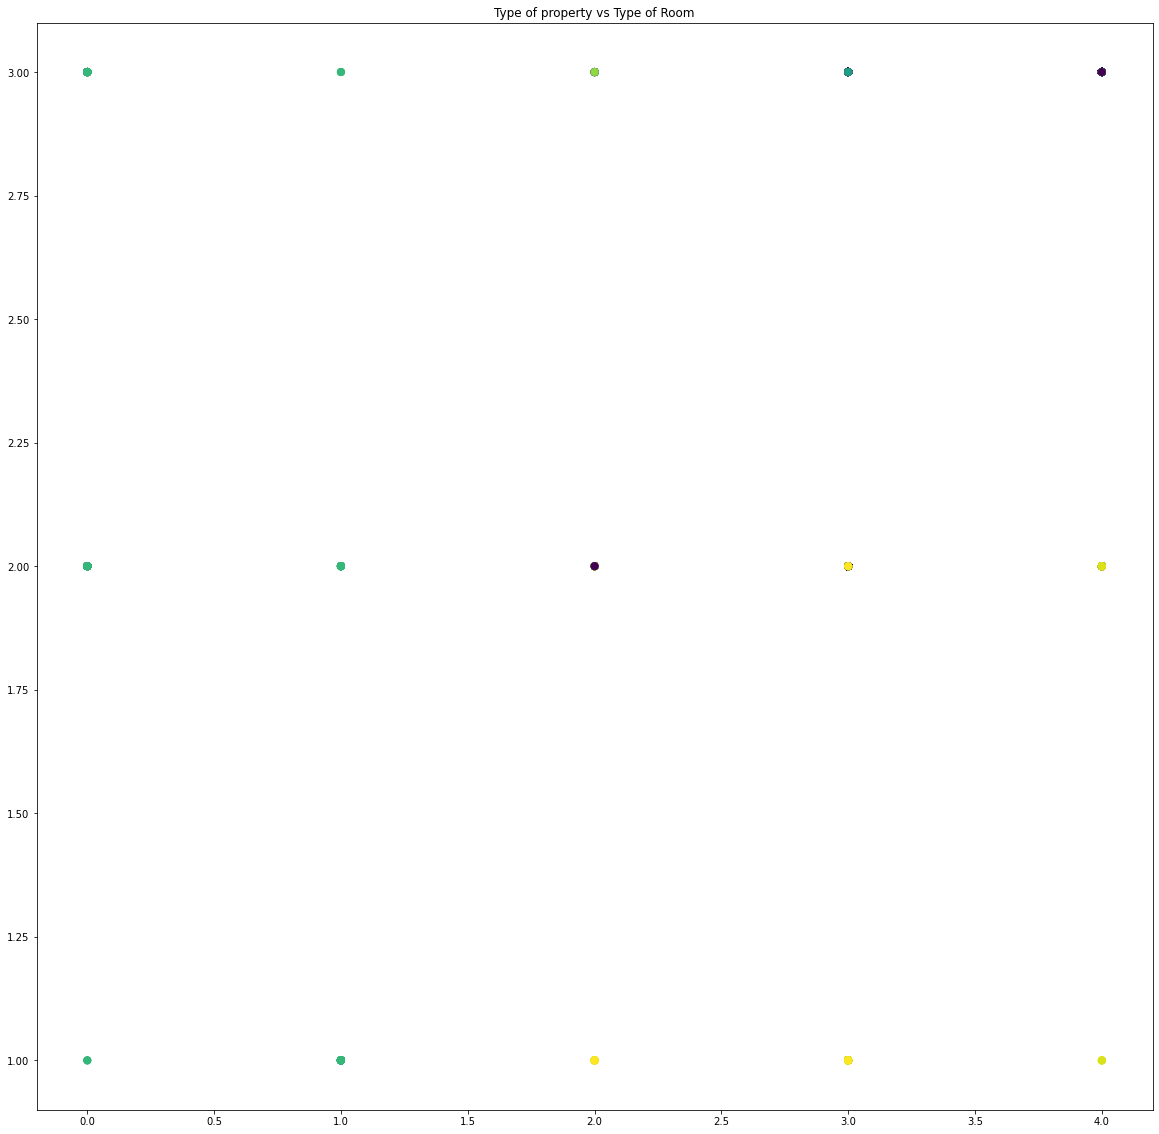

<Figure size 432x288 with 0 Axes>

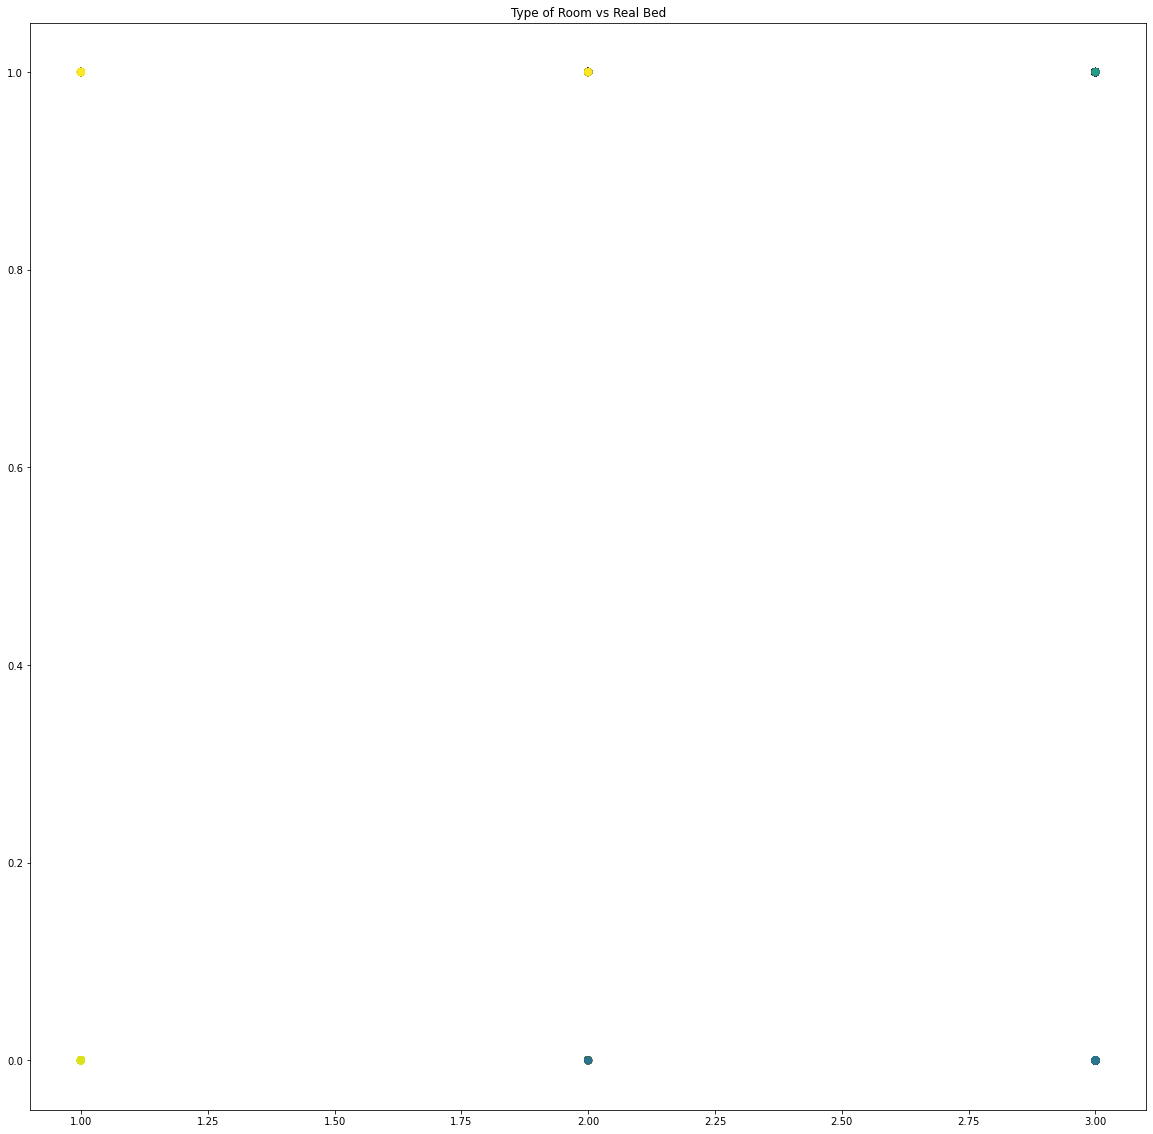

<Figure size 432x288 with 0 Axes>

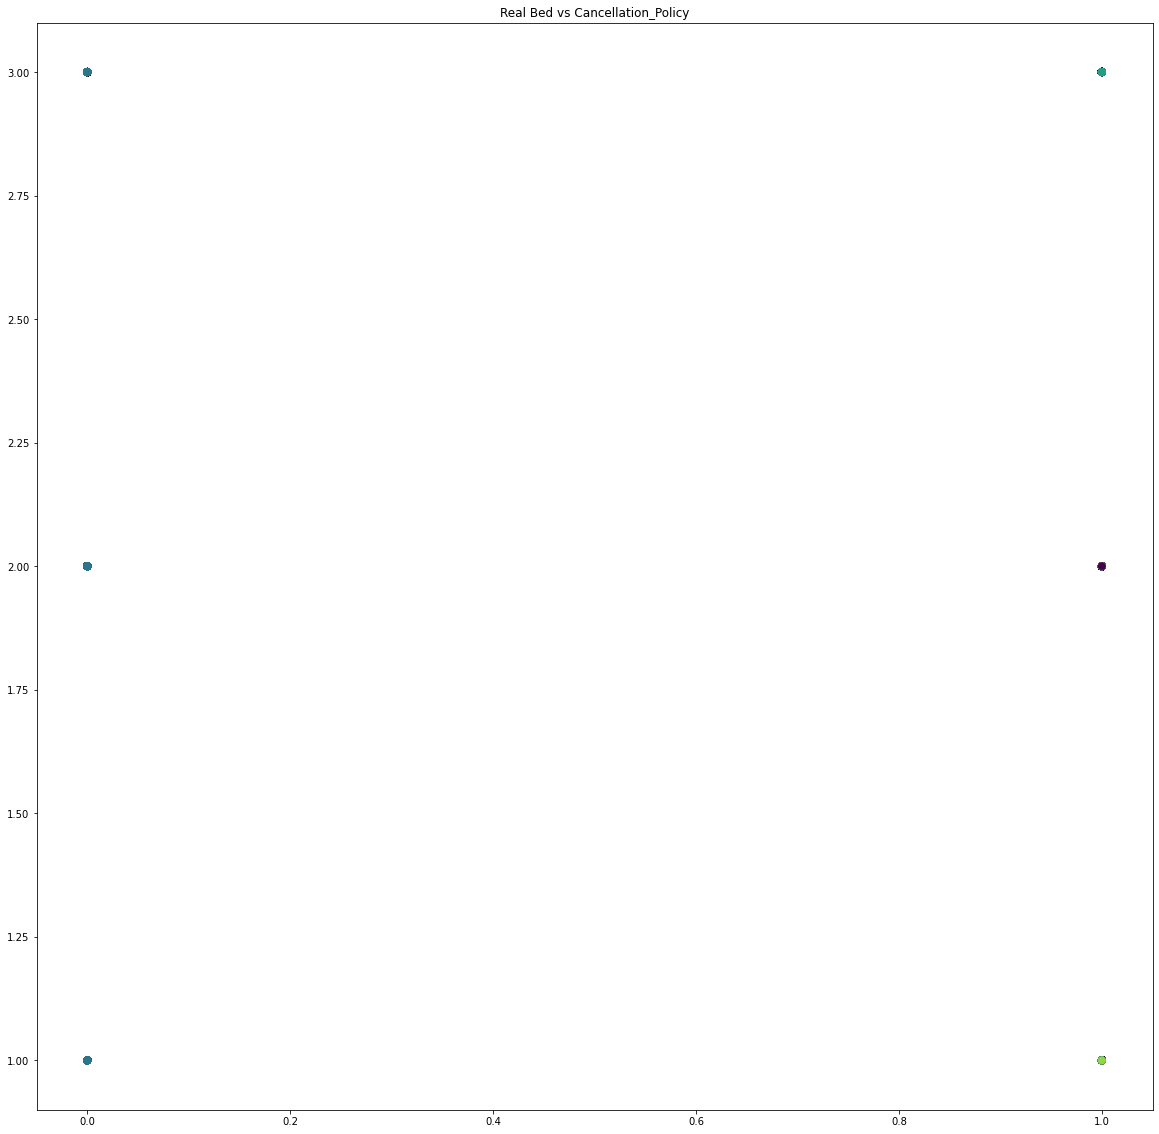

<Figure size 432x288 with 0 Axes>

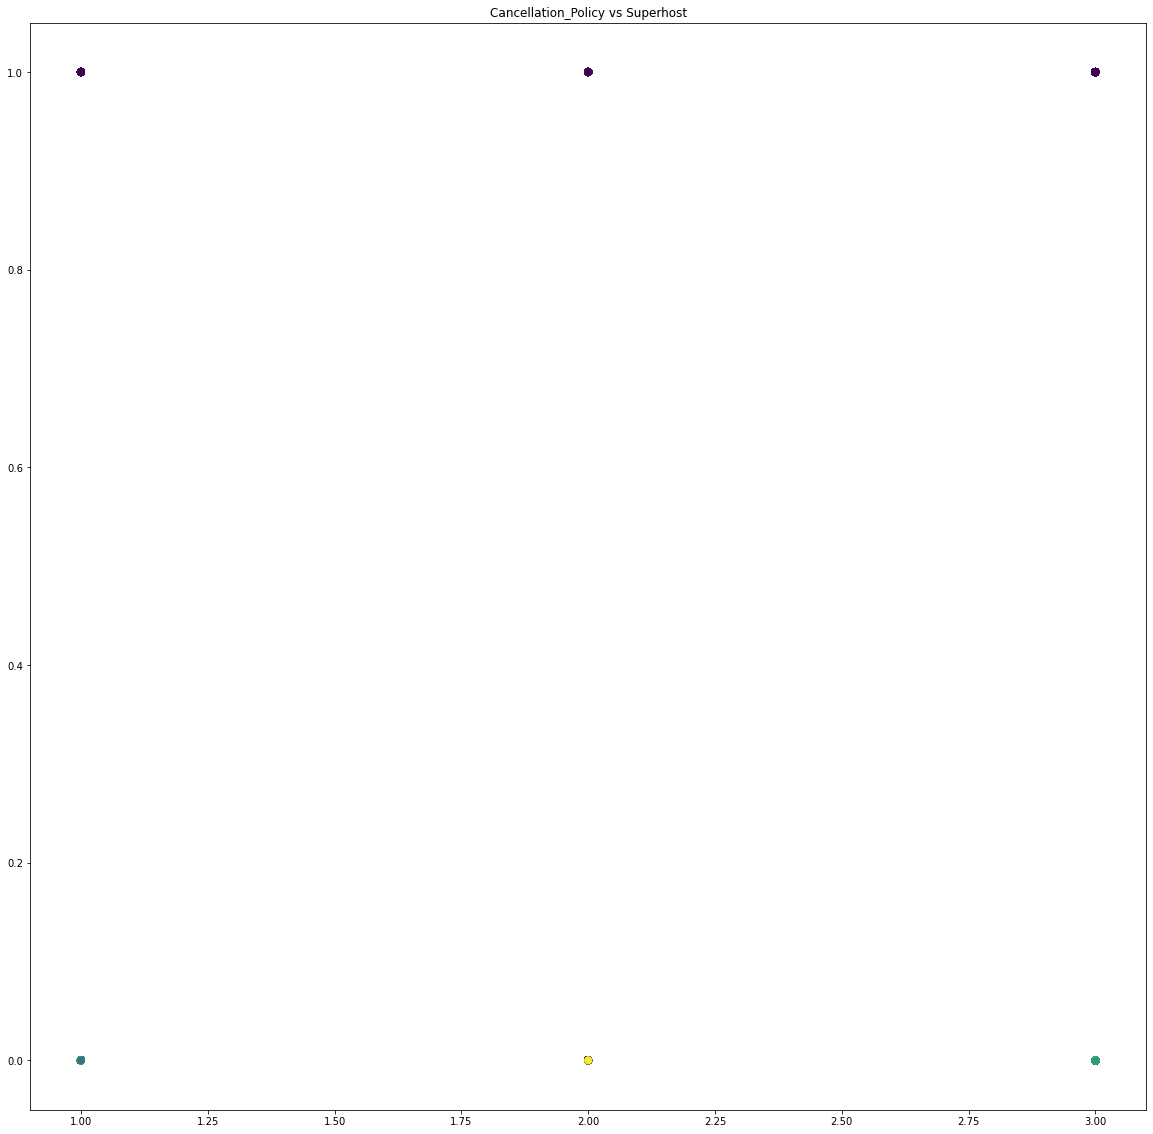

<Figure size 432x288 with 0 Axes>

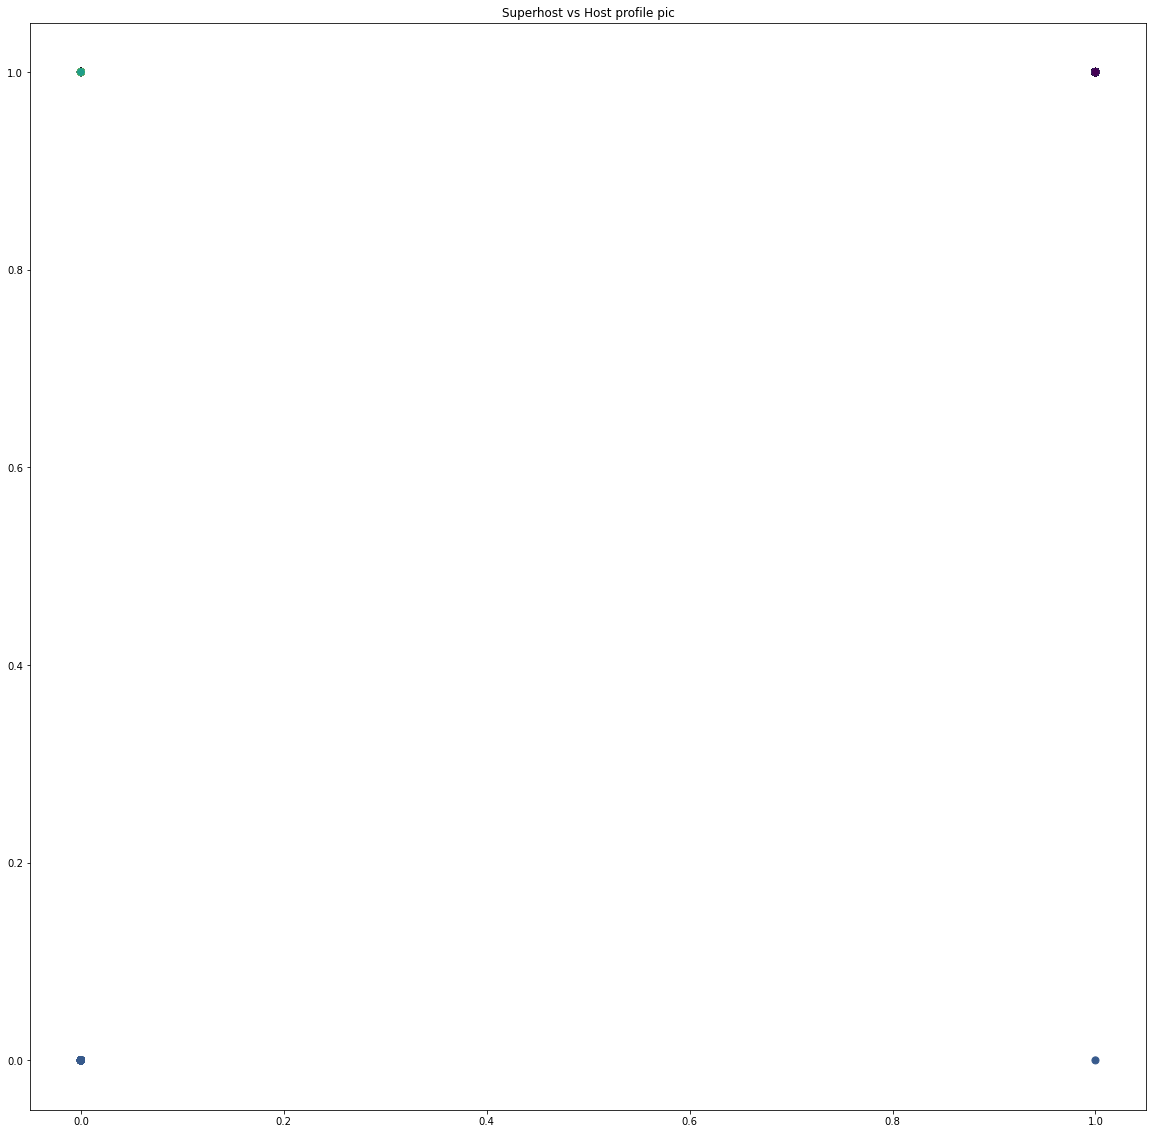

<Figure size 432x288 with 0 Axes>

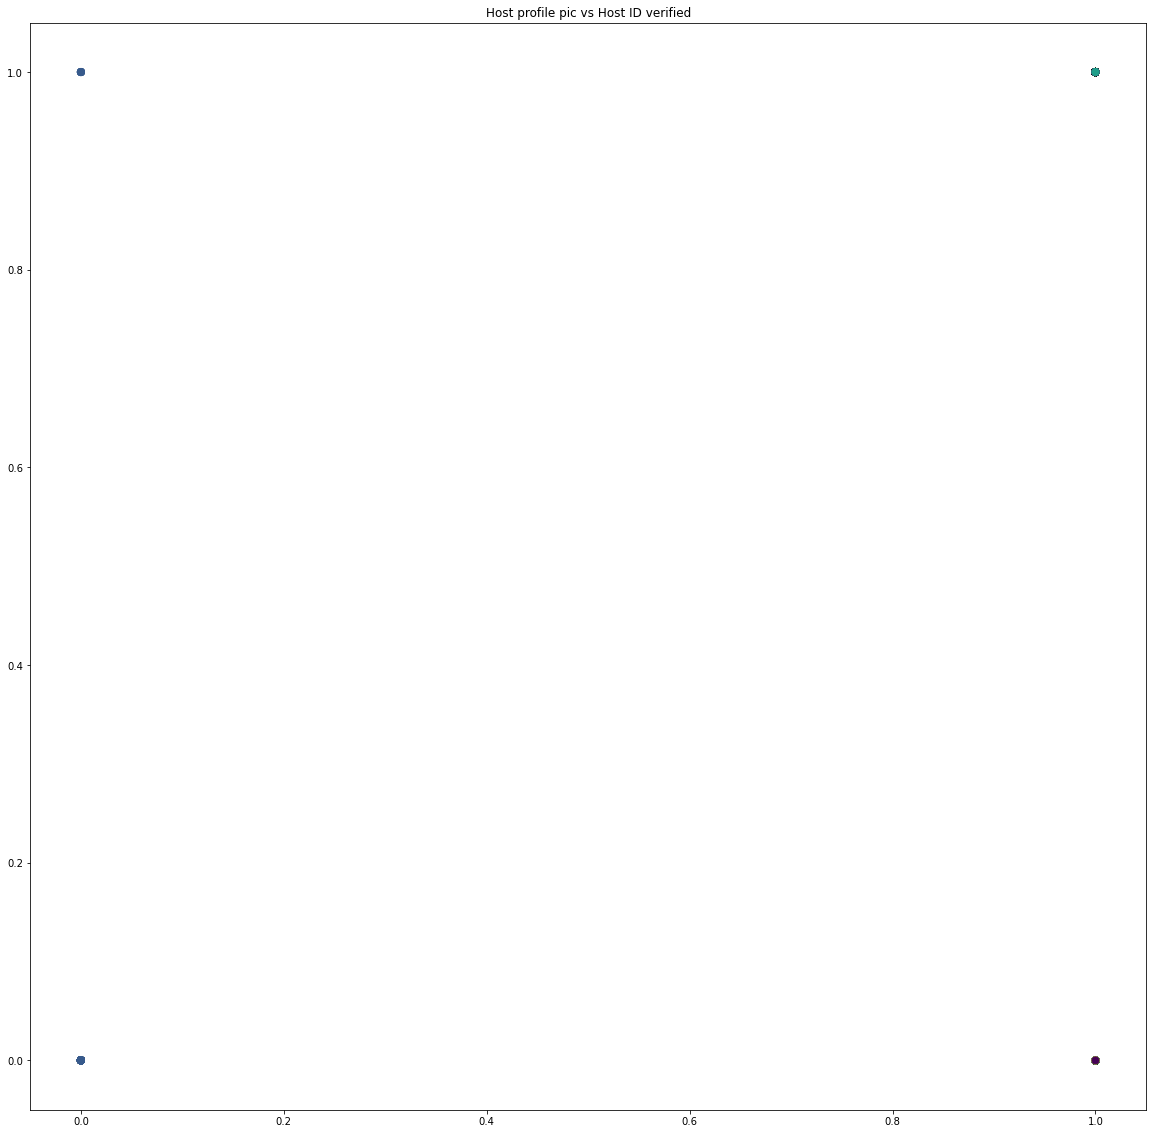

<Figure size 432x288 with 0 Axes>

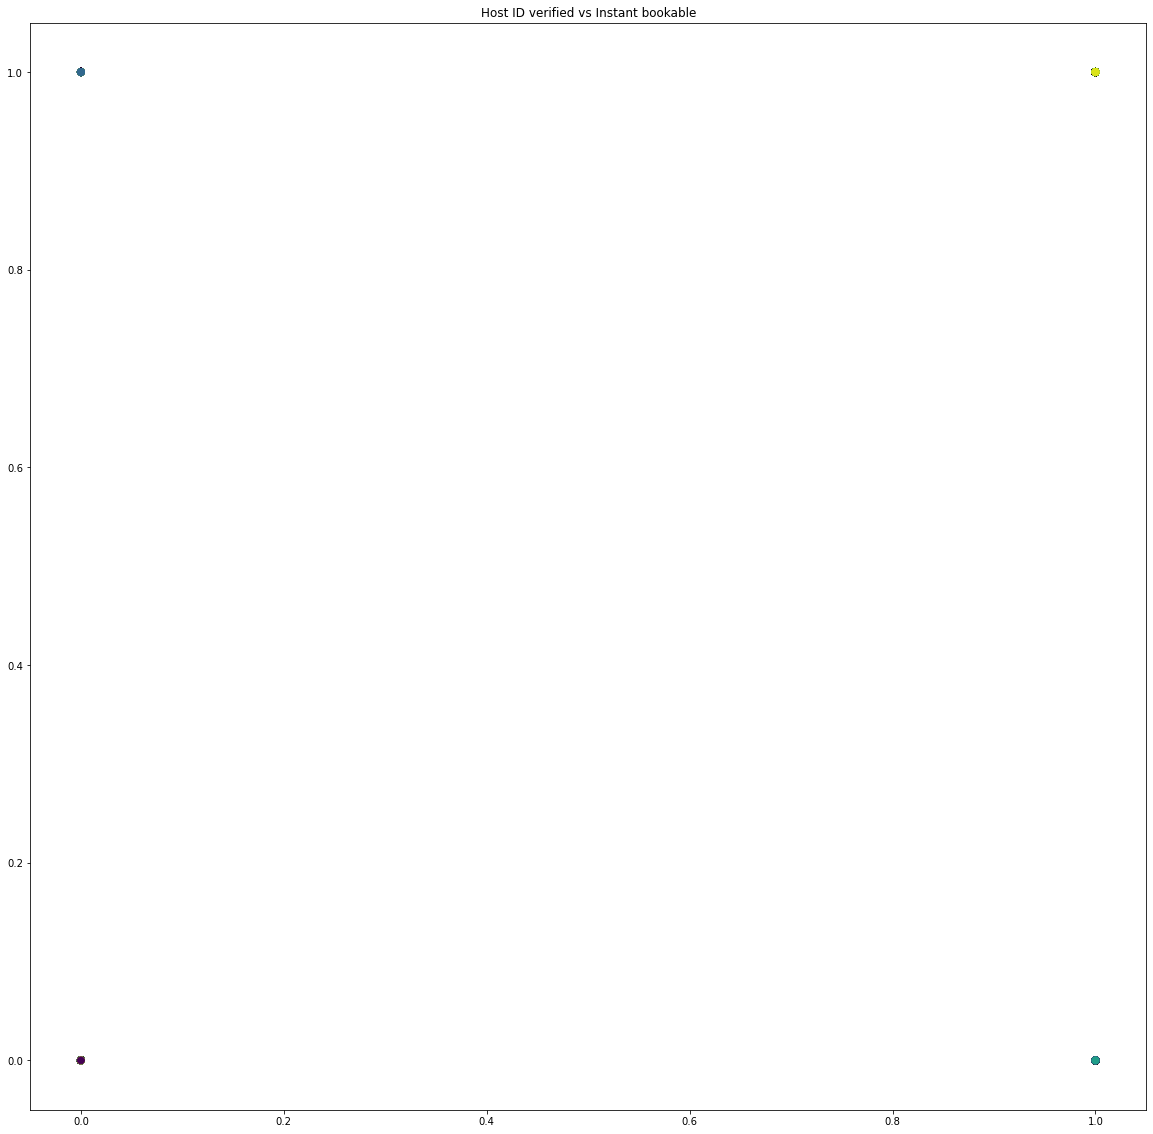

<Figure size 432x288 with 0 Axes>

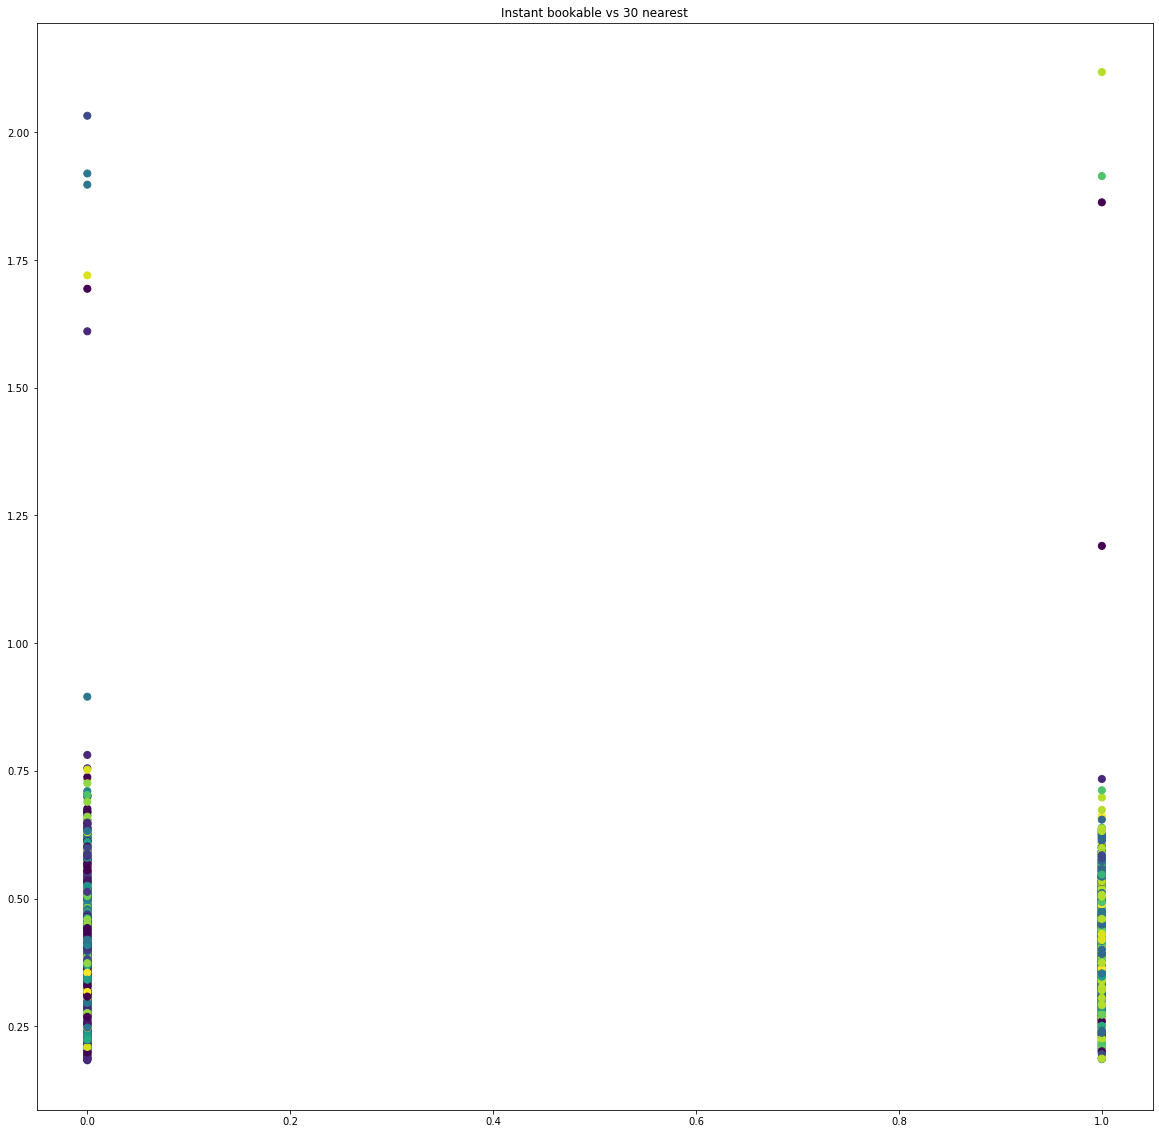

<Figure size 432x288 with 0 Axes>

In [22]:
for i in range(len(df_kmean.columns)-1):
    plt.figure(figsize=(20,20))
    plt.title(f"{df_kmean.columns[i]} vs {df_kmean.columns[i+1]}")
    plt.scatter(df_kmean.iloc[:, i], df_kmean.iloc[:, i+1], c=cluster_appartenance, s=50, cmap='viridis')
    plt.show()
    plt.savefig(f"fig{i}.png")

In [27]:
km3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
cluster_appartenance3 = km3.predict(X)

In [29]:
cluster_appartenance3

array([2, 0, 1, ..., 1, 0, 0])

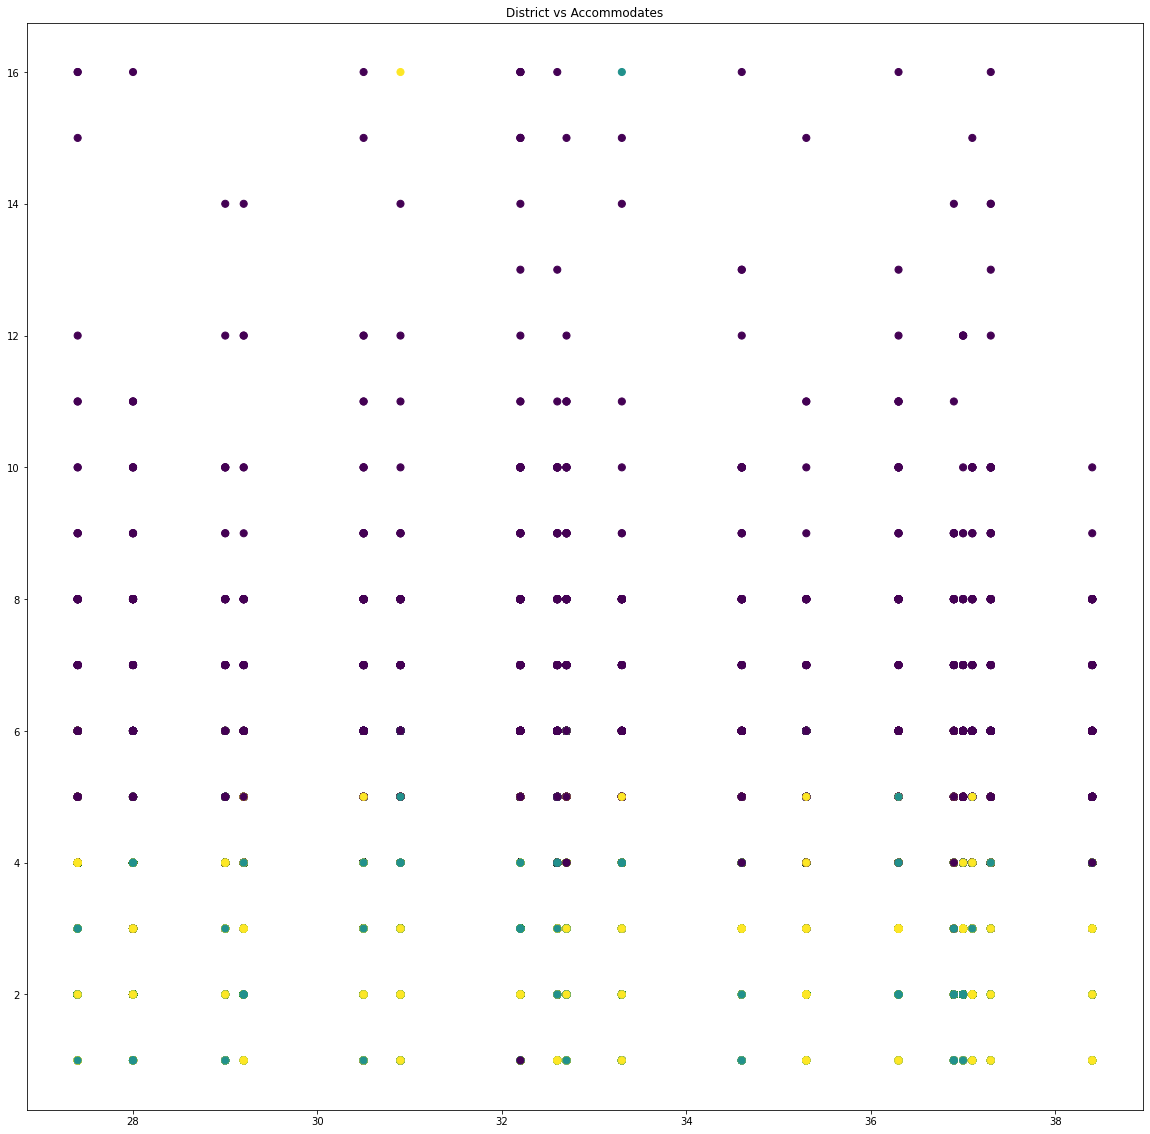

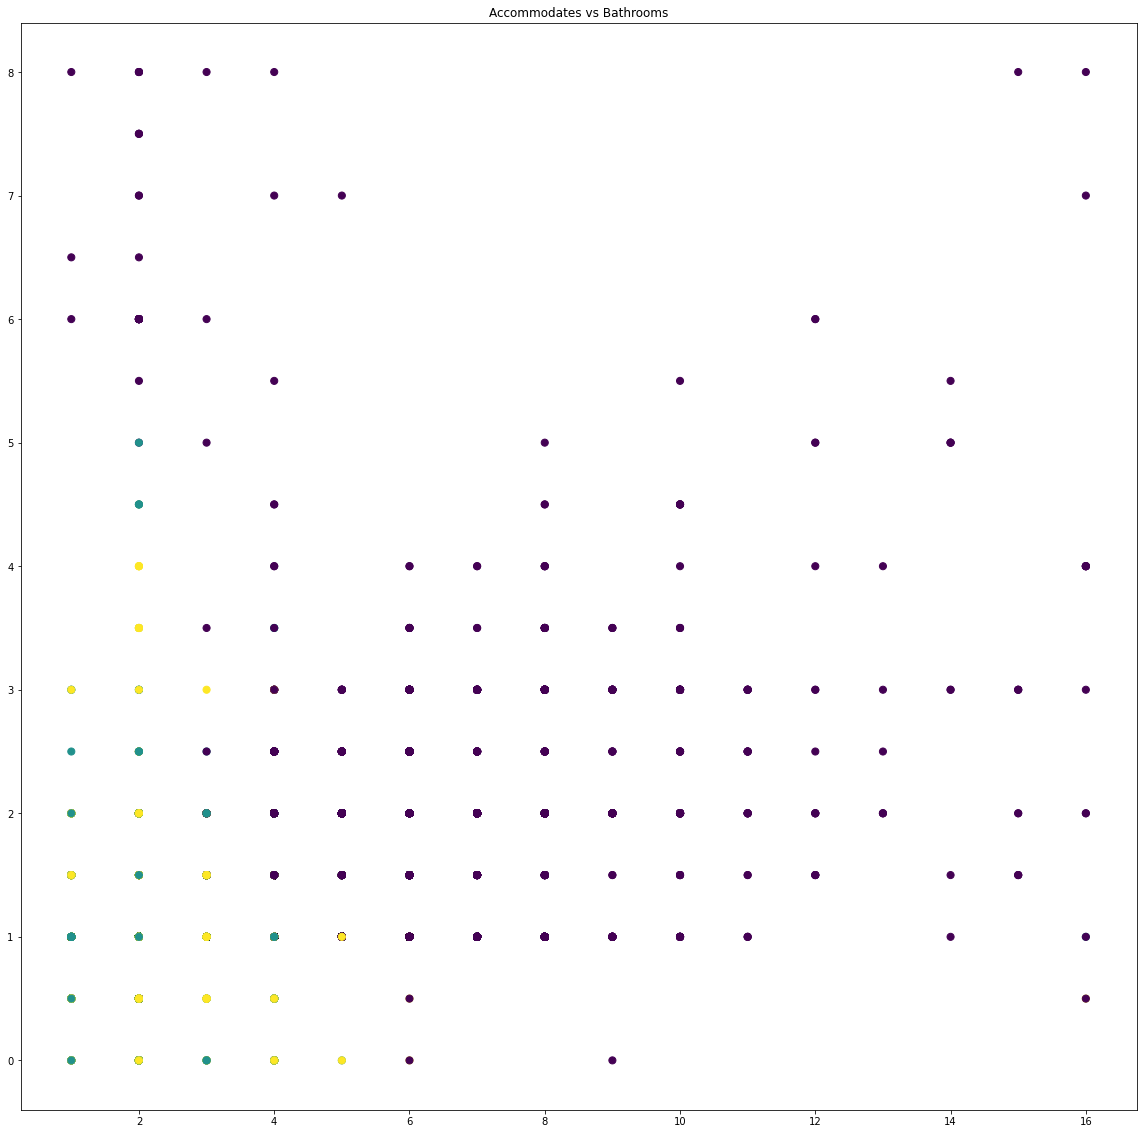

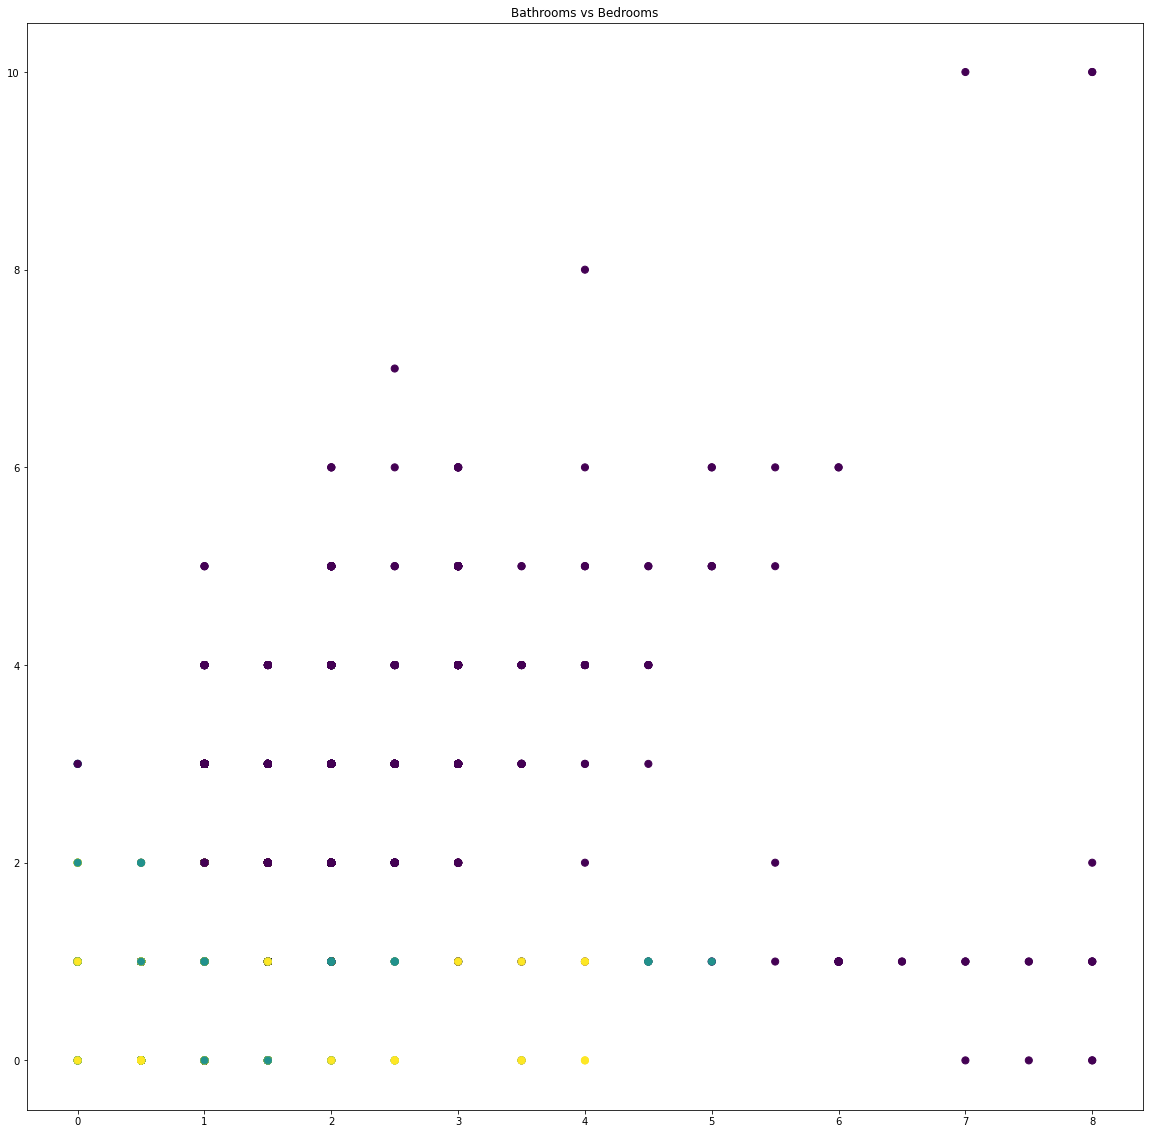

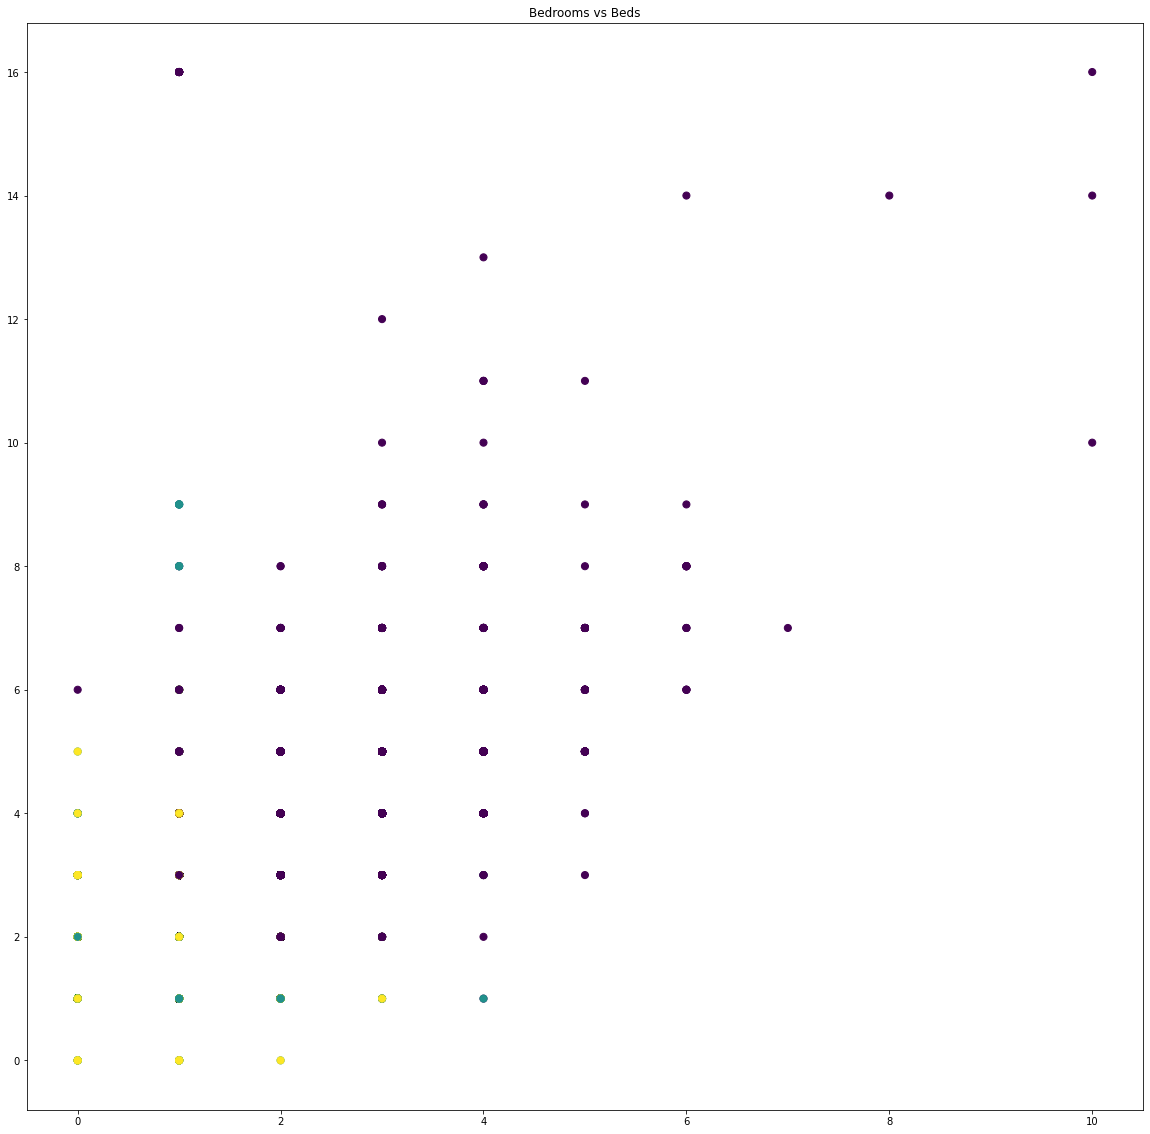

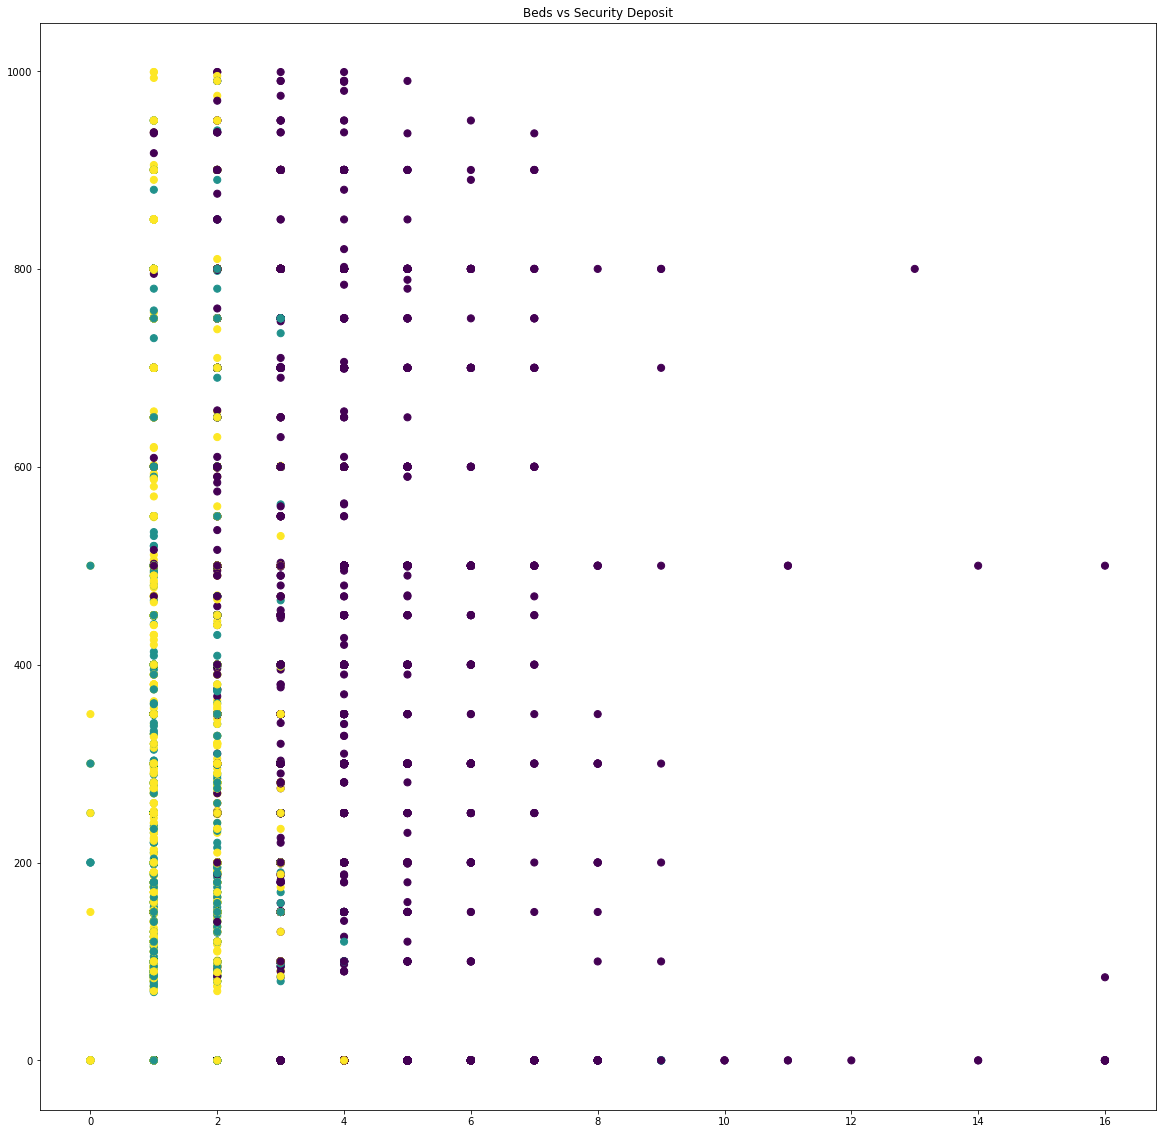

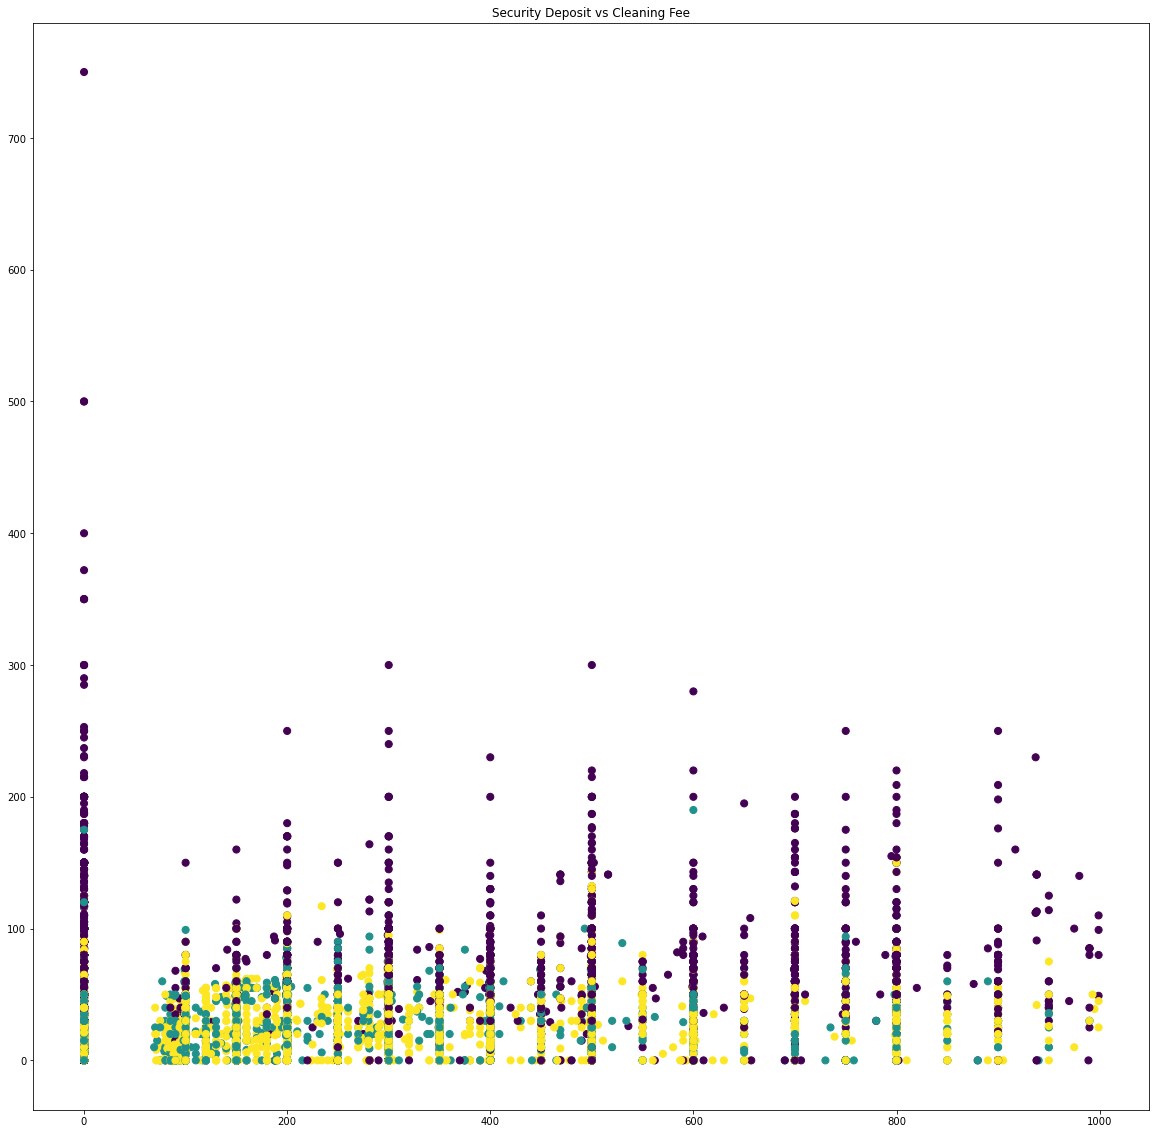

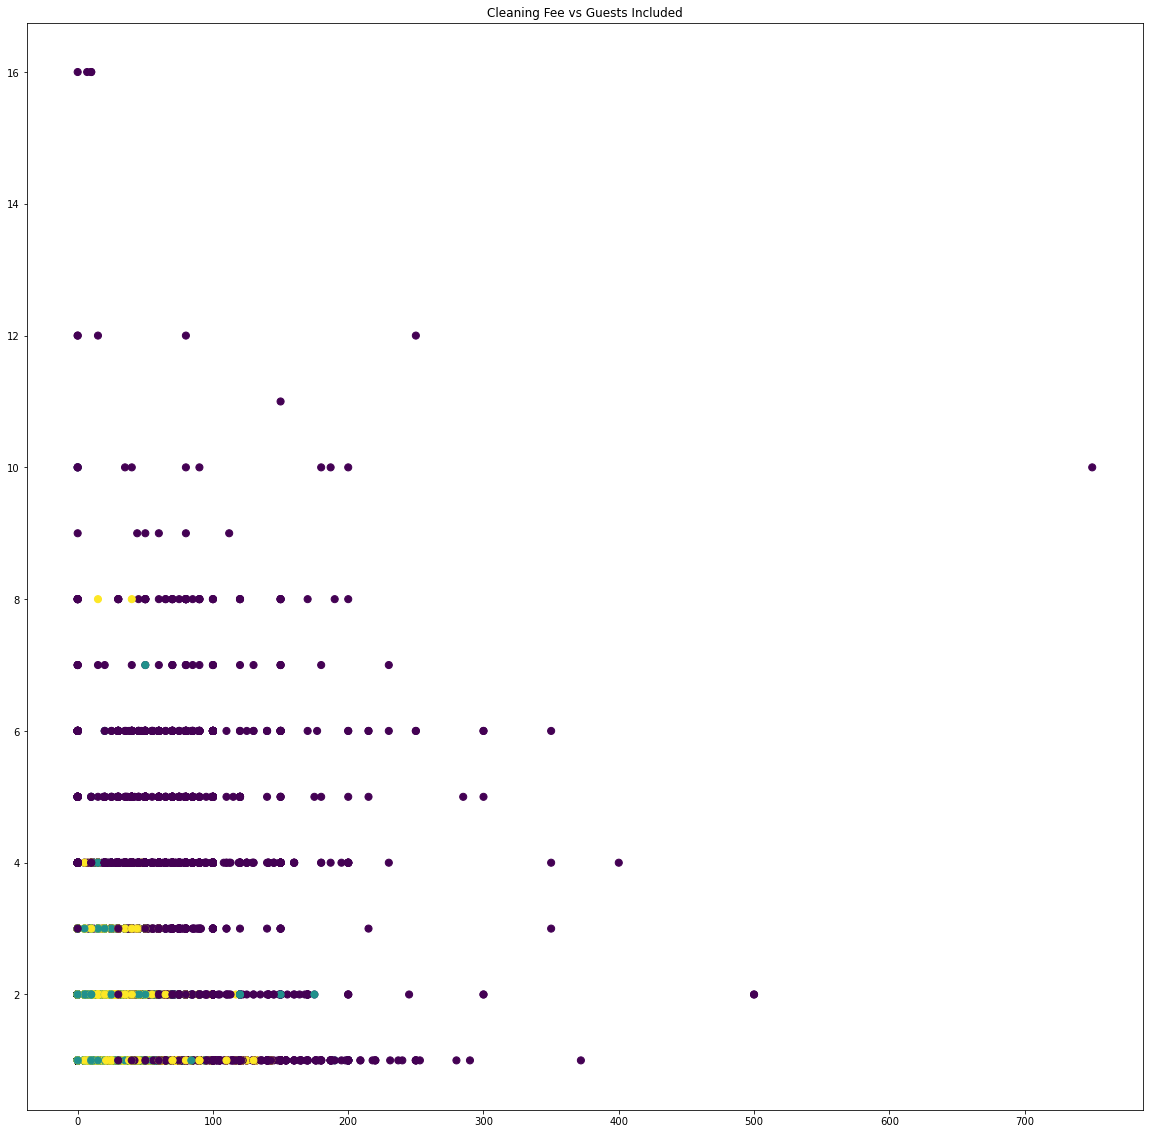

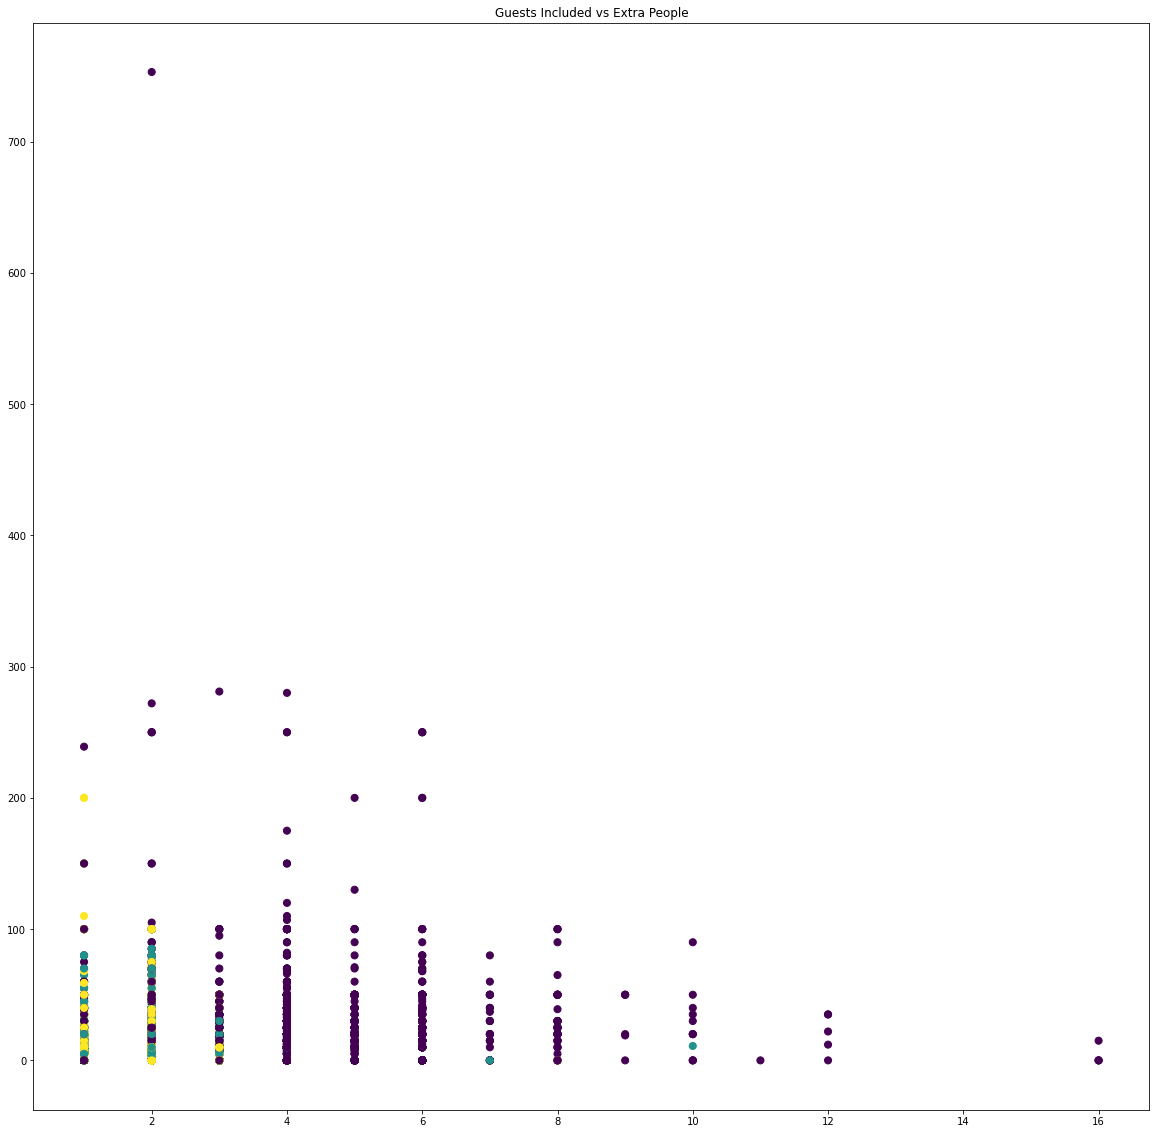

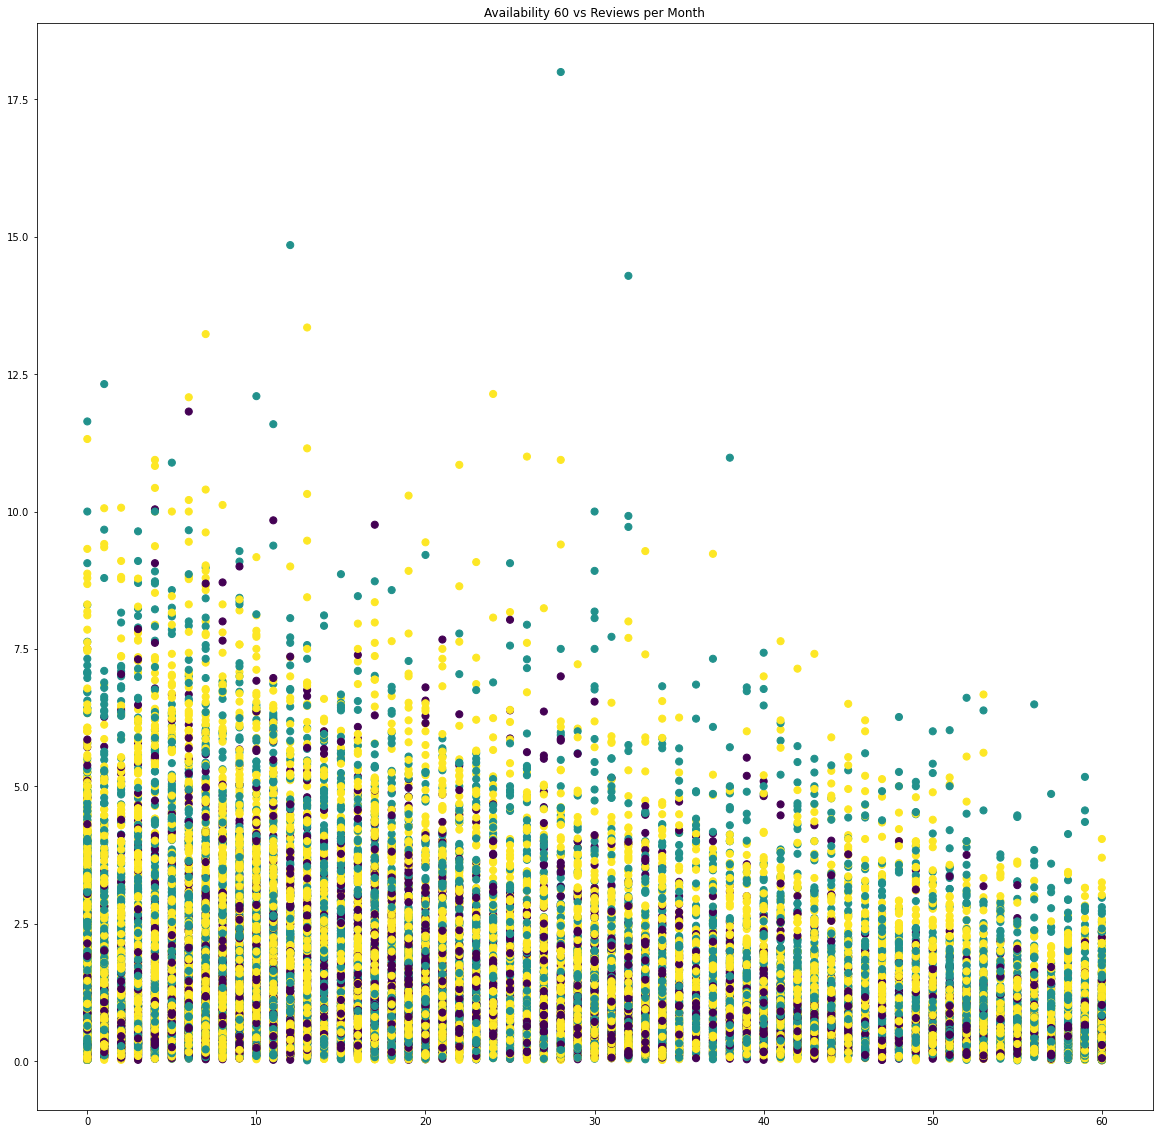

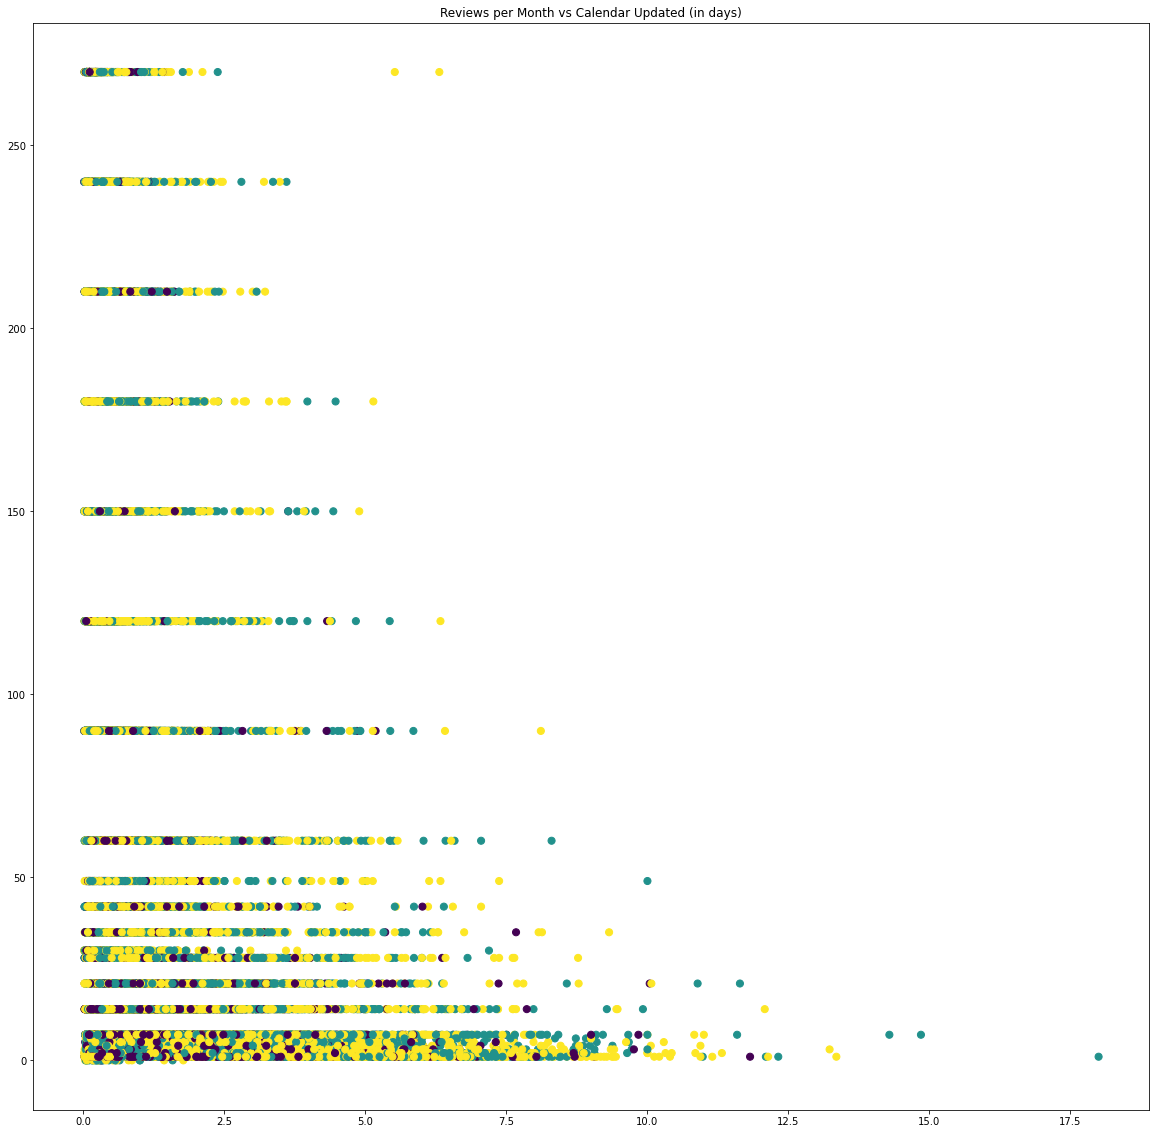

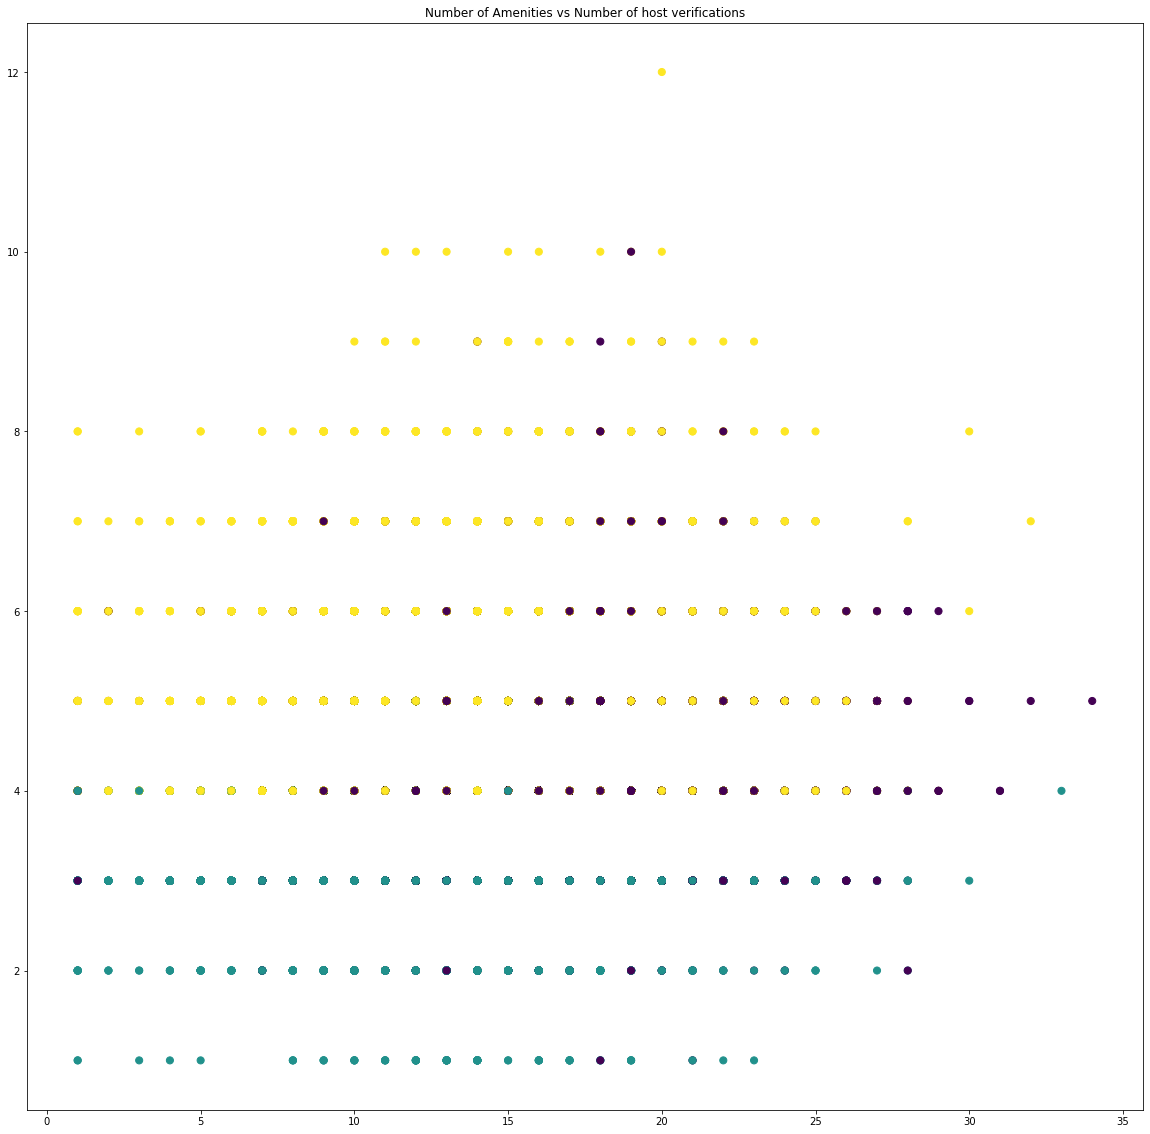

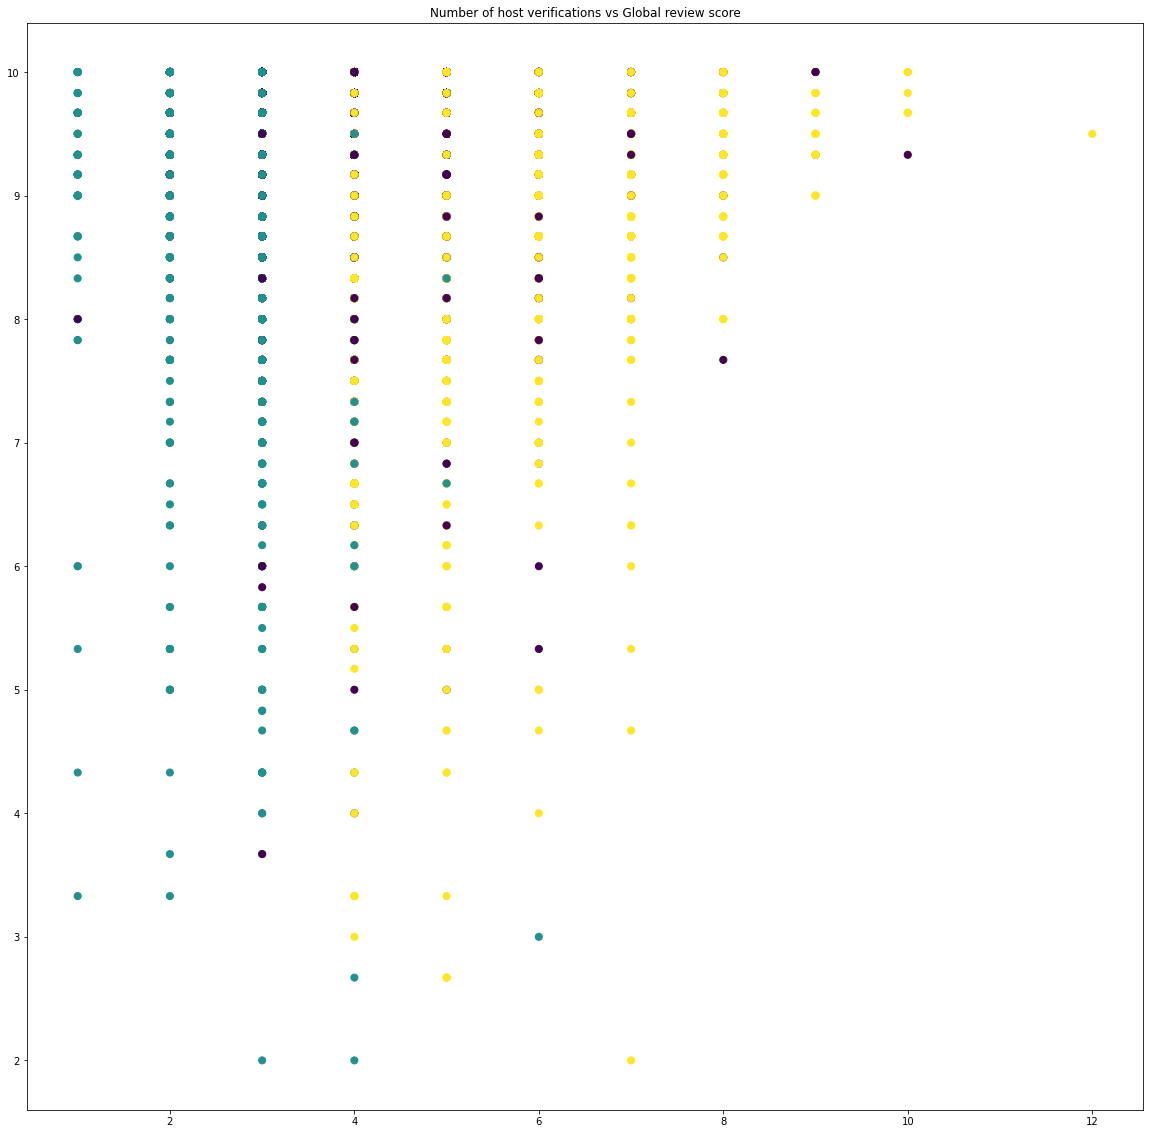

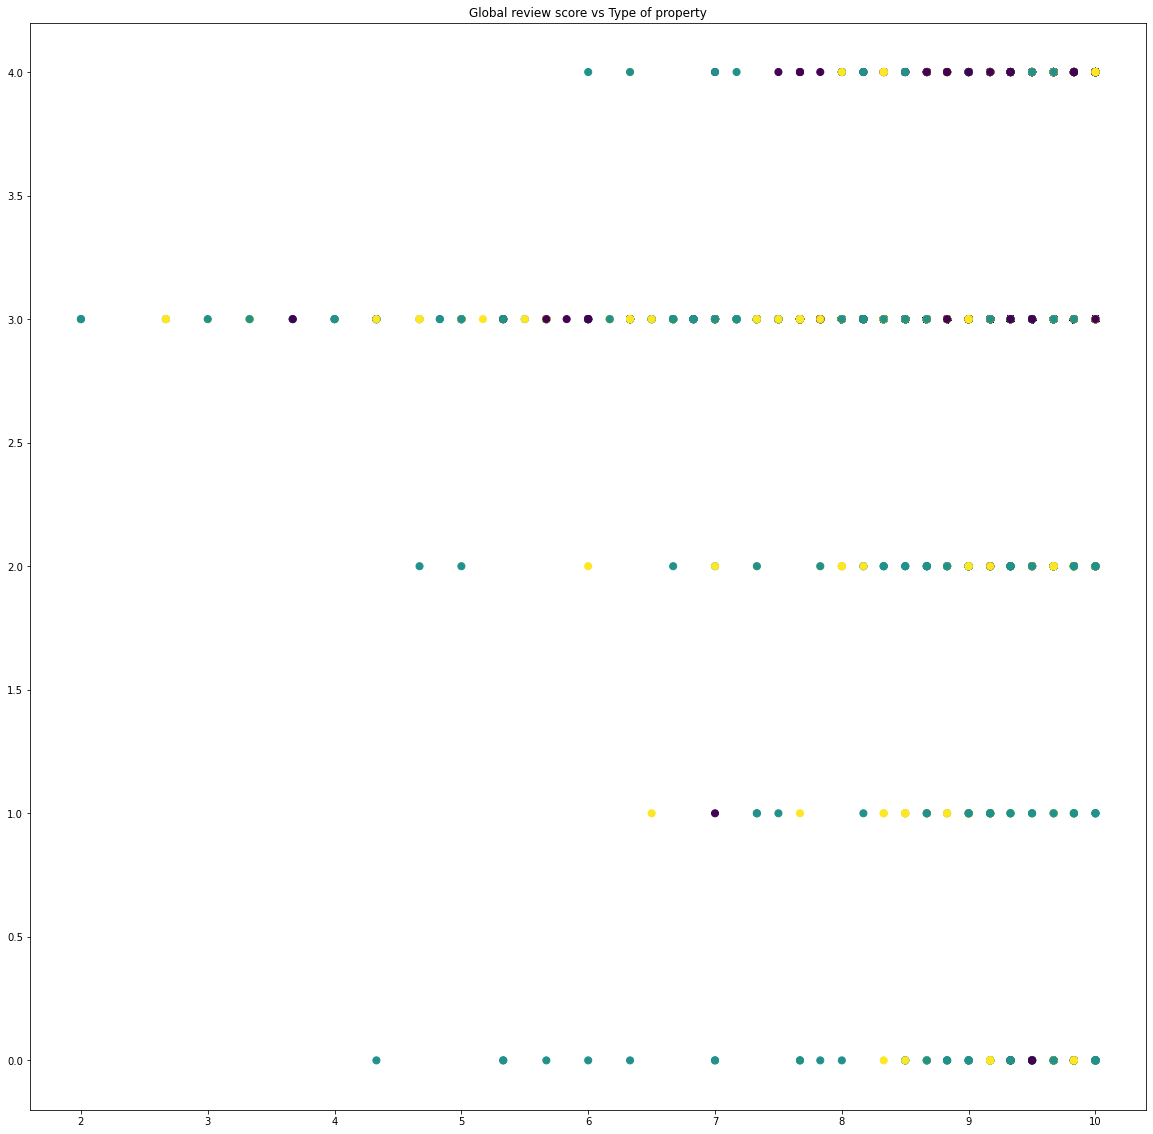

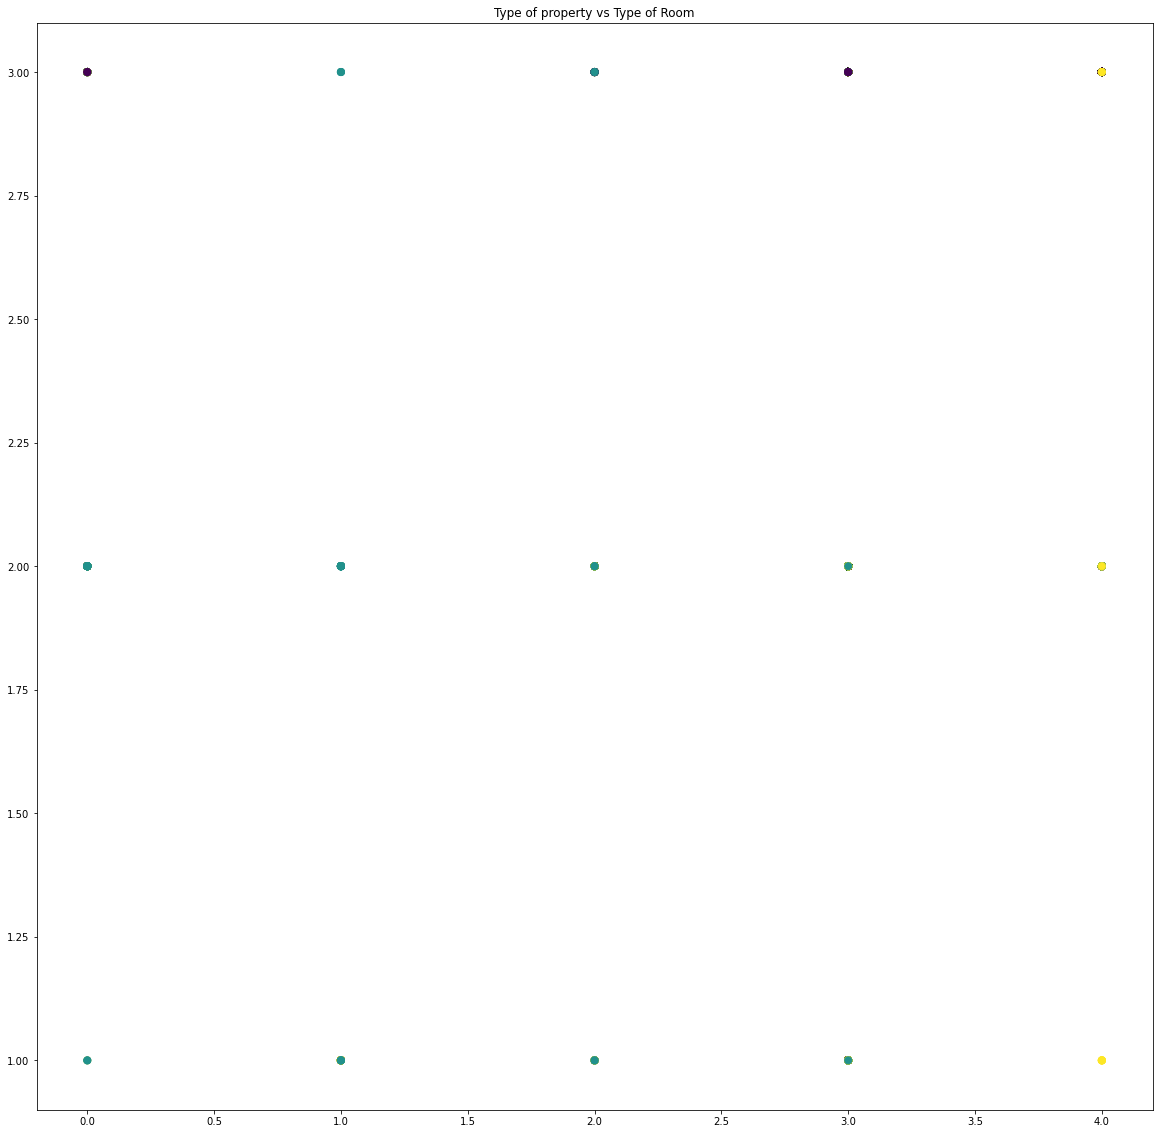

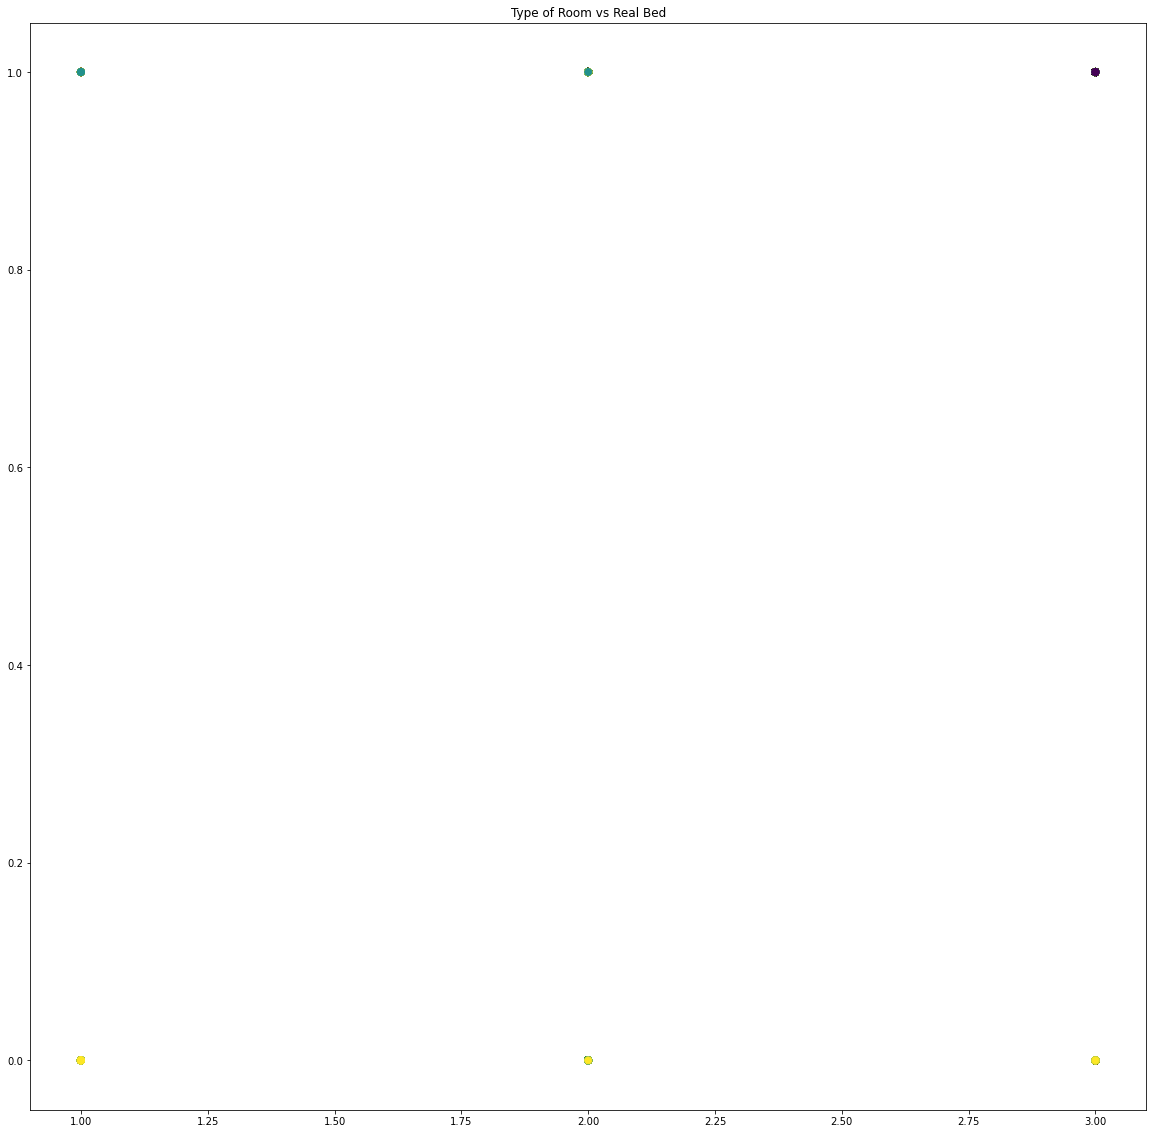

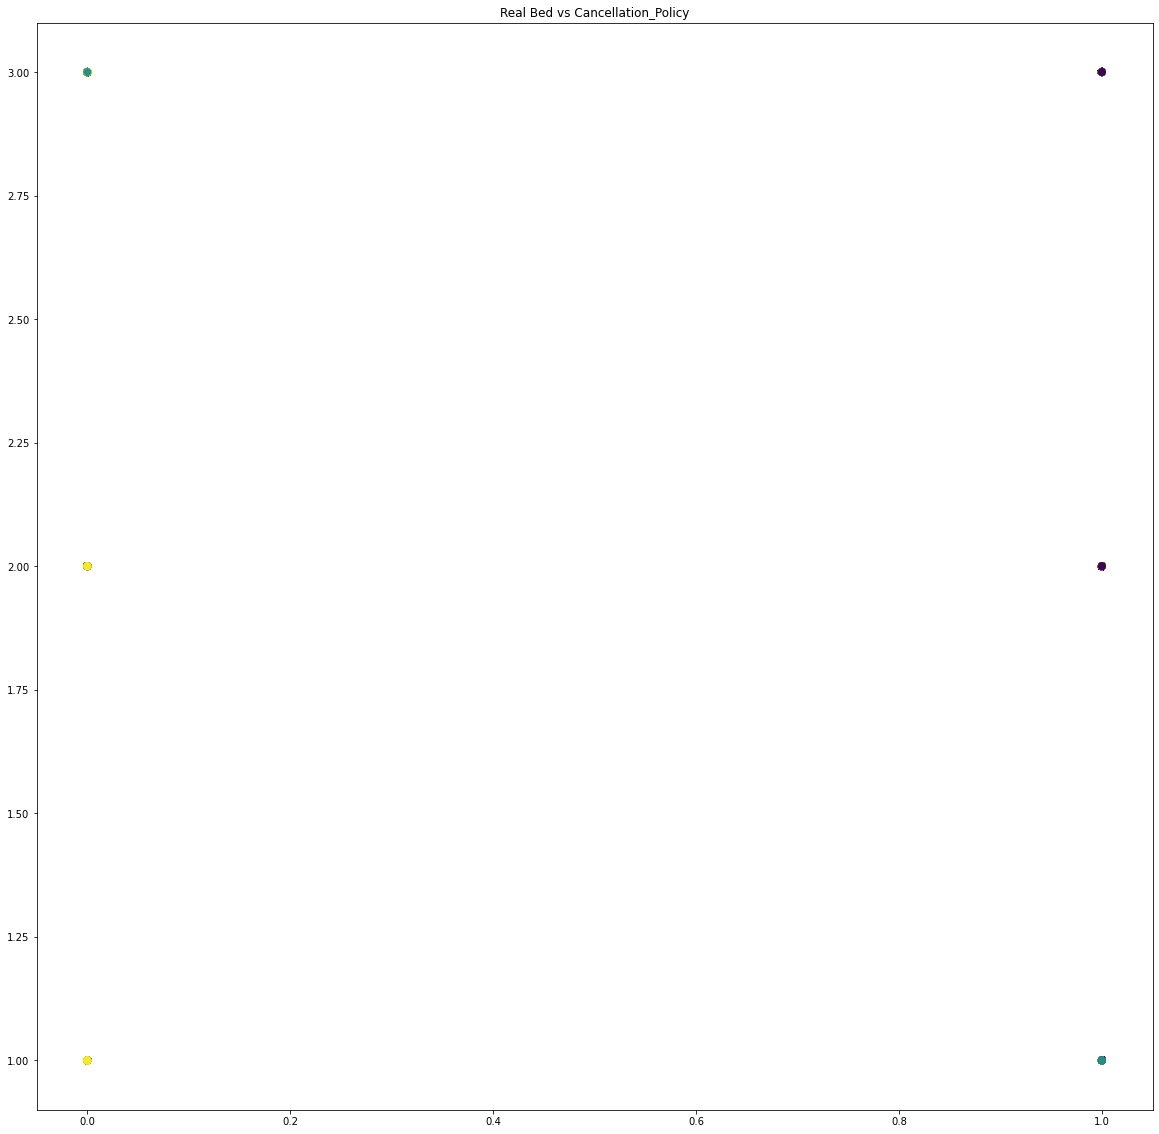

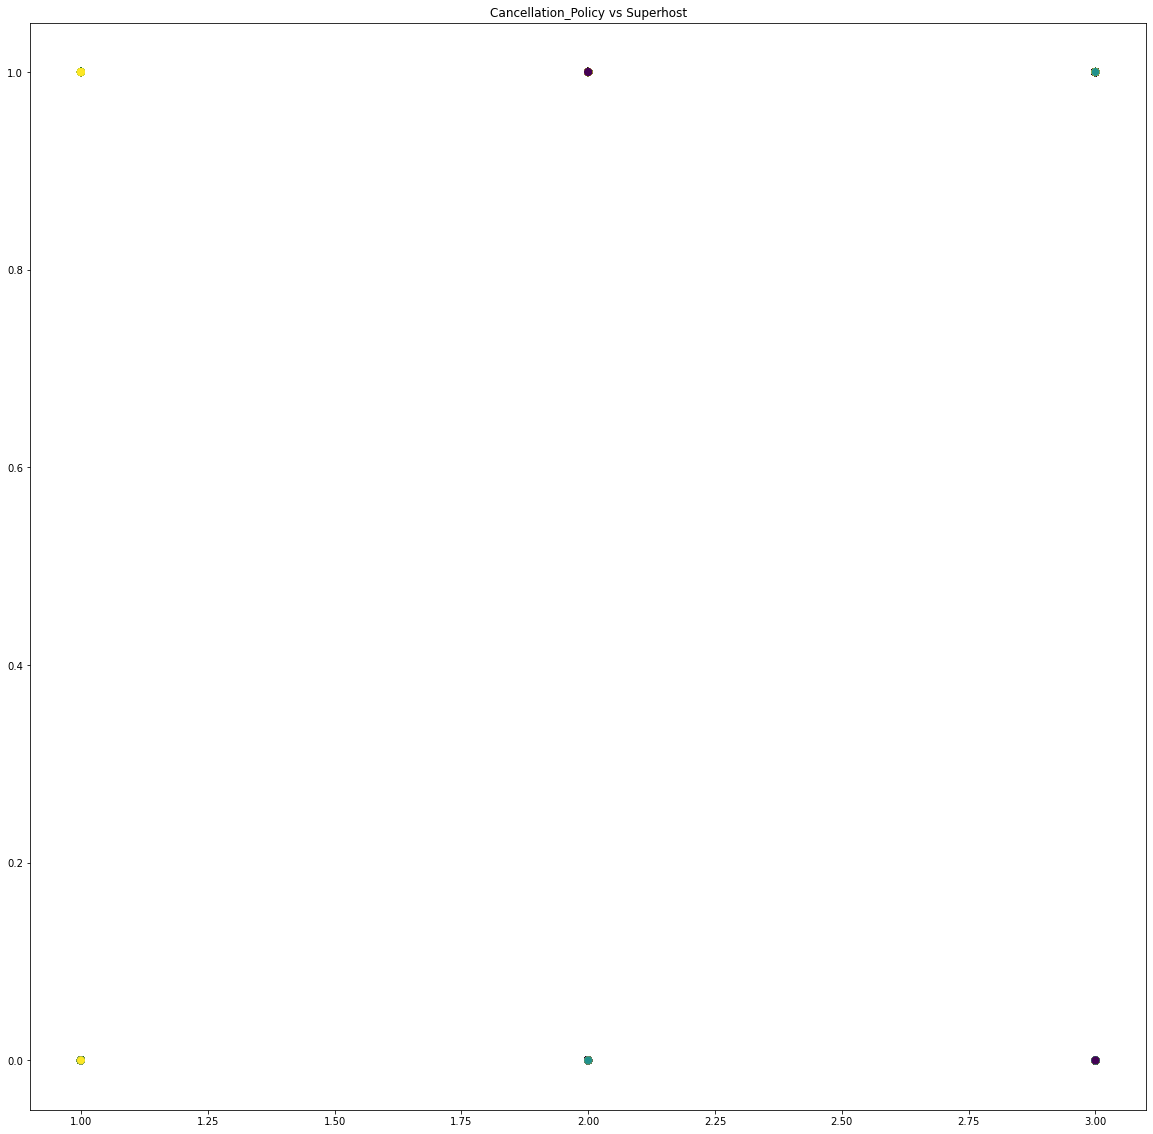

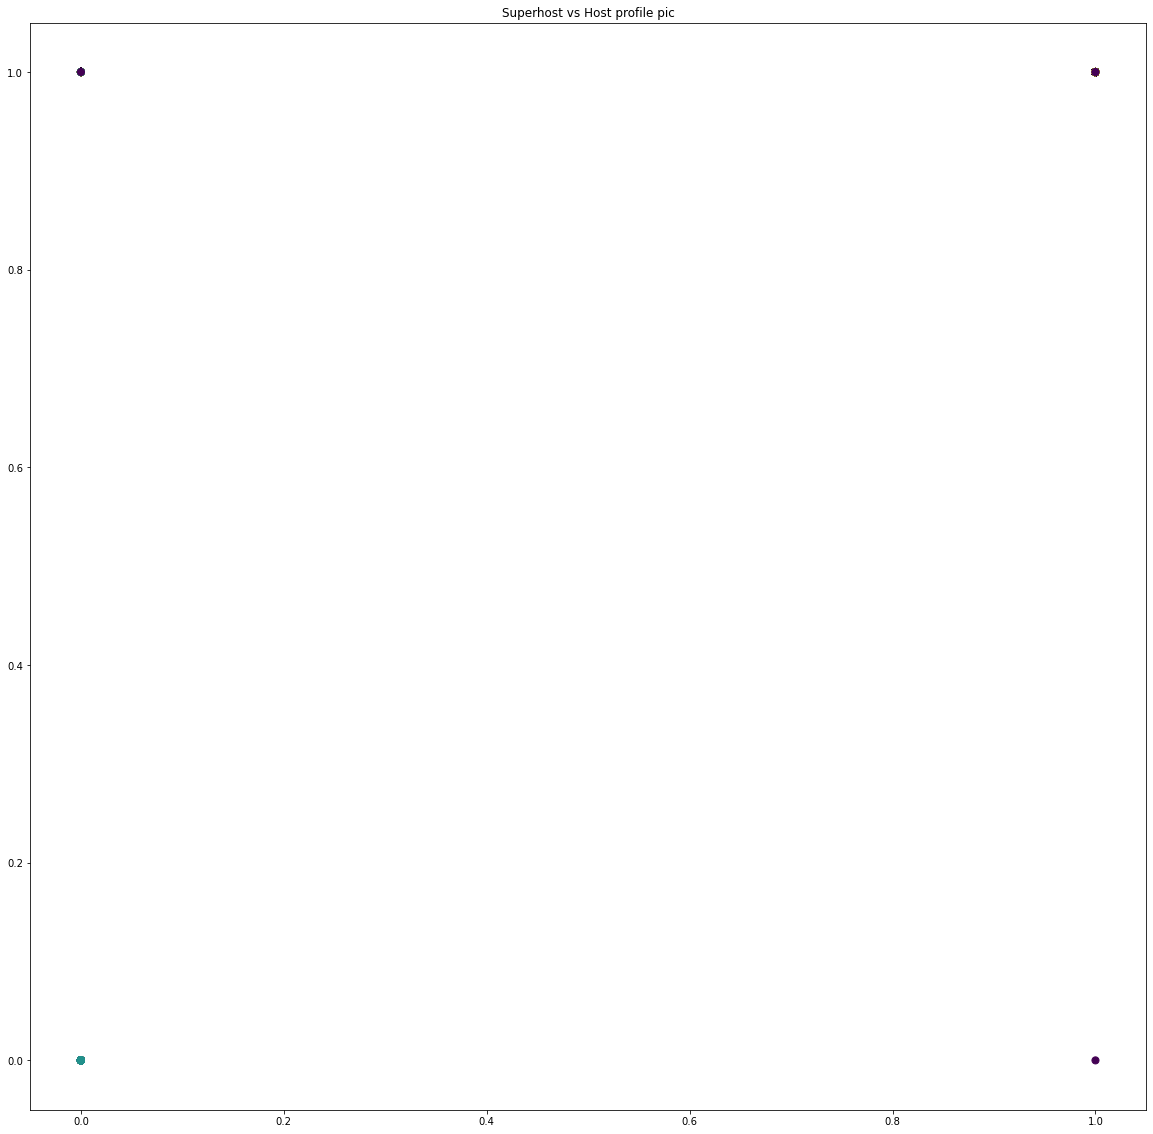

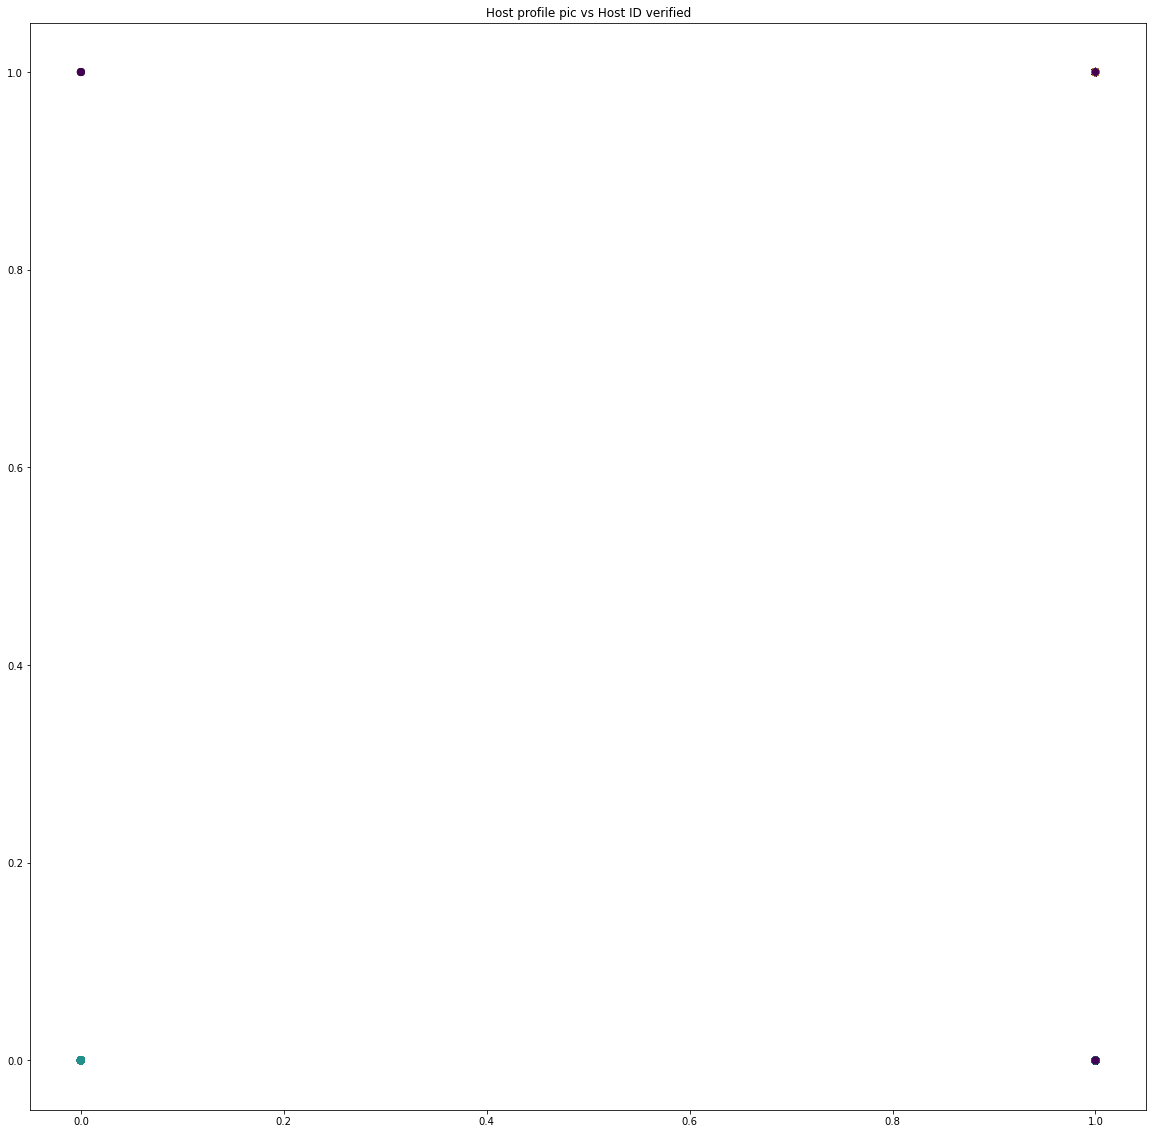

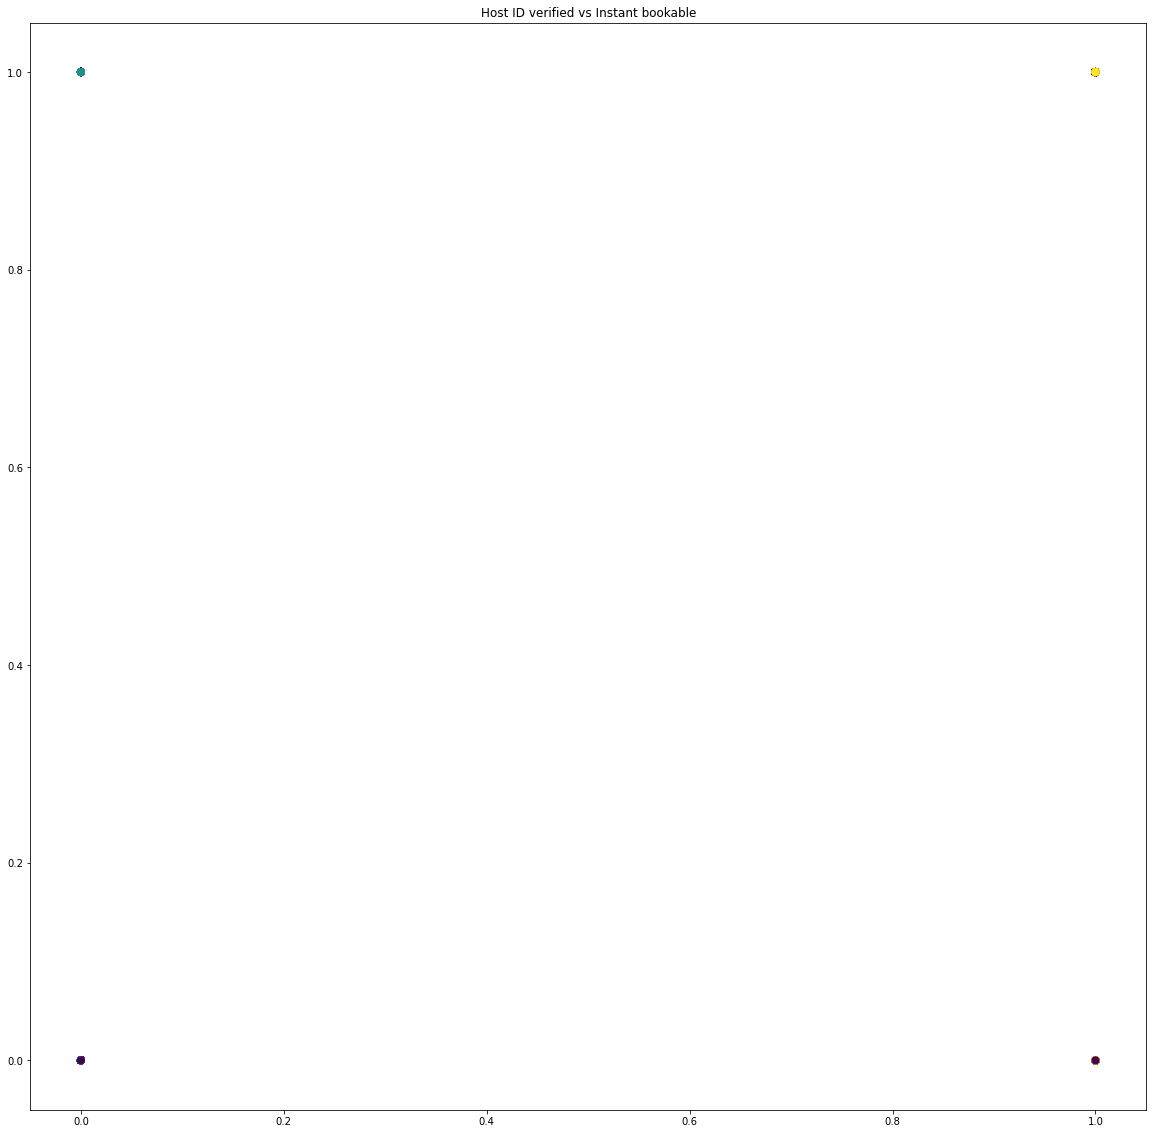

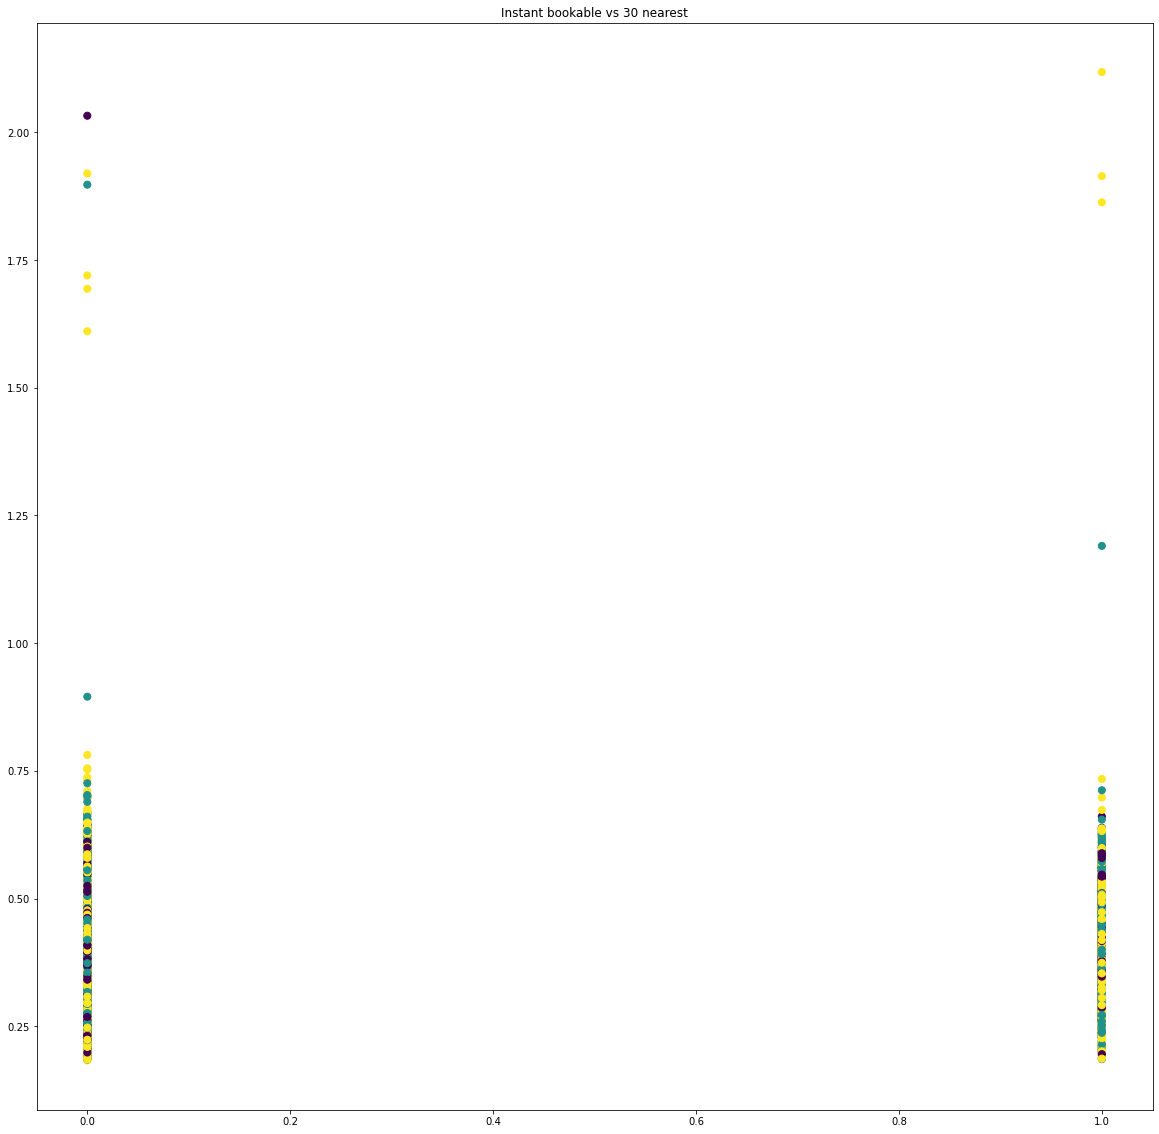

In [30]:
for i in range(len(df_kmean.columns)-1):
    plt.figure(figsize=(20,20))
    plt.title(f"{df_kmean.columns[i]} vs {df_kmean.columns[i+1]}")
    plt.scatter(df_kmean.iloc[:, i], df_kmean.iloc[:, i+1], c=cluster_appartenance3, s=50, cmap='viridis')
    plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40042 entries, 0 to 40043
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   District                      40042 non-null  int64  
 1   Accommodates                  40042 non-null  int64  
 2   Bathrooms                     40042 non-null  float64
 3   Bedrooms                      40042 non-null  float64
 4   Beds                          40042 non-null  float64
 5   Price                         40042 non-null  float64
 6   Security Deposit              40042 non-null  float64
 7   Cleaning Fee                  40042 non-null  float64
 8   Guests Included               40042 non-null  int64  
 9   Extra People                  40042 non-null  int64  
 10  Availability 60               40042 non-null  int64  
 11  Reviews per Month             40042 non-null  float64
 12  Calendar Updated (in days)    40042 non-null  int64  
 13  H

In [60]:
df_bis = df[['Price']]

In [61]:
X_bis = scale_bis.fit_transform(df_bis)

In [62]:
k_bis, res_df = optimalK(X_bis, nrefs=3, maxClusters=20)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [139]:
k_bis

1

In [73]:
res_df

clusterCount       gap
0            1.0 -2.486851
1            2.0 -2.997856
2            3.0 -3.206041
3            4.0 -3.295981
4            5.0 -3.321079
5            6.0 -3.365760
6            7.0 -3.369264
7            8.0 -3.372502
8            9.0 -3.343560
9           10.0 -3.365832
10          11.0 -3.371069
11          12.0 -3.390990
12          13.0 -3.326513
13          14.0 -3.338077
14          15.0 -3.359105
15          16.0 -3.379765
16          17.0 -3.377048
17          18.0 -3.375313
18          19.0 -3.355578